In [1]:
# Importing data and reading libraries
import numpy as np
import pandas as pd

df = pd.read_csv(r"C:\Users\jvrdo\Downloads\tidy_table.csv")

In [2]:
# First look into data
df

,dob,velicina_mm,hist_tip,gradus,er,pr,her2,ki67,imunofenotip,broj_meta
0,61,0.8,NOSinvazivnikarcinom,2,95.0,70,0,95.0,luminal_B,0
1,75,1.8,NOSinvazivnikarcinom,2,100.0,100,3,35.0,luminal_B_Hp,1
2,65,1.2,NOSinvazivnikarcinom,2,100.0,15,3,20.0,luminal_B_Hp,0
3,71,3.0,NOSinvazivnikarcinom,2,85.0,3,2,35.0,luminal_B,4
4,82,3.0,NOSinvazivnikarcinom,2,0.0,0,0,50.0,3n,1
...,...,...,...,...,...,...,...,...,...,...
9957,43,0.5,NOSinvazivnikarcinom,2,100.0,35,1,42.0,luminal_B,5
9958,66,4.8,NOSinvazivnikarcinom,2,100.0,90,0,44.0,luminal_B,2
9959,57,0.8,NOSinvazivnikarcinom,2,25.0,25,1,34.0,luminal_B,3
9960,46,1.6,NOSinvazivnikarcinom,2,100.0,1,0,42.0,luminal_B,2


In [3]:
# Creating a dataframe copy to work on
df_c = df.copy()

In [6]:
# Creating a function that returns 1 if "broj meta lc" is >0:
def target(df_c):
    if df_c["broj_meta"] > 0:
        return 1
    else:
        return 0

In [7]:
# Applying function to our dataframe
df_c["Target"] = df_c.apply(lambda df_c: target(df_c), axis=1)

In [9]:
# Drop the old column
df_c.drop("broj_meta", axis=1, inplace=True)

In [8]:
# Check the correlation matrix
df.corr()

,Unnamed: 0,dob pri dg,velicina_tumora (mm),gradus,er,pr,her2,ki67,broj_meta_lc
Unnamed: 0,1.000000,-0.073748,-0.003986,-0.027261,-0.024805,-0.048821,-0.033948,0.084308,0.033431
dob pri dg,-0.073748,1.000000,0.080130,-0.031846,0.088897,0.010167,-0.077028,-0.101726,0.026267
velicina_tumora (mm),-0.003986,0.080130,1.000000,0.230260,-0.128798,-0.101498,0.021683,0.188907,0.344926
gradus,-0.027261,-0.031846,0.230260,1.000000,-0.373753,-0.305029,0.182628,0.540072,0.147838
er,-0.024805,0.088897,-0.128798,-0.373753,1.000000,0.533571,-0.104222,-0.477567,-0.058308
pr,-0.048821,0.010167,-0.101498,-0.305029,0.533571,1.000000,-0.164716,-0.318077,-0.086295
her2,-0.033948,-0.077028,0.021683,0.182628,-0.104222,-0.164716,1.000000,0.115634,0.023045
ki67,0.084308,-0.101726,0.188907,0.540072,-0.477567,-0.318077,0.115634,1.000000,0.109219
broj_meta_lc,0.033431,0.026267,0.344926,0.147838,-0.058308,-0.086295,0.023045,0.109219,1.000000


In [9]:
# Creating a new df in which we drop "imunofenotip_txt" (since it can be discerned from er pr and her2)
#df_2= df_c.drop("imunofenotip_txt", axis=1)

In [10]:
# Dropping the name_index
#df_2.drop("Unnamed: 0", axis=1, inplace=True)


In [30]:
# Dropping the name_index
#df_c.drop("Unnamed: 0", axis=1, inplace=True)

In [10]:
# Checking "histoloski_tip" unique values
df_c["hist_tip"].unique()

array(['NOSinvazivnikarcinom', 'lobularniinvazivni', 'mucinozniinvazivni',
       'tubularniinvazivni', 'drugirijetkitipovi',
       'Casmedularnimkarakteristikama', 'metaplastičnikarcinom',
       'mikropapilarniinvazivnikarcinom', 'Casapokrinomdiferencijacijom',
       'mikroinvazivnikarcinom', 'kribriformniinvazivni'], dtype=object)

In [11]:
# Checking result
df_c["imunofenotip"].value_counts()

luminal_B       4843
luminal_A       2694
luminal_B_Hp    1078
3n               950
Hp               397
Name: imunofenotip, dtype: int64

In [25]:
# Checking result
df_c["histoloski_tip_txt"].unique()

array(['NOS_invazivni', 'lobularni invazivni', 'mucinozni invazivni',
       'tubularni invazivni', 'drugi rijetki tipovi',
       'Ca s medularnim karakteristikama', 'metaplastični karcinom',
       'mikropapilarni invazivni karcinom',
       'Ca s apokrinom diferencijacijom', 'mikroinvazivni karcinom',
       'kribriformni invazivni', 'inflamatorni', 'miješani NOS/lobularni'],
      dtype=object)

In [26]:
# Value count on "histoloski_tip"
df_c["histoloski_tip_txt"].value_counts()

NOS_invazivni                        8053
lobularni invazivni                  1170
mucinozni invazivni                   218
drugi rijetki tipovi                  131
Ca s medularnim karakteristikama       72
mikropapilarni invazivni karcinom      71
kribriformni invazivni                 68
metaplastični karcinom                 55
Ca s apokrinom diferencijacijom        52
tubularni invazivni                    49
mikroinvazivni karcinom                21
inflamatorni                            1
miješani NOS/lobularni                  1
Name: histoloski_tip_txt, dtype: int64

Since "inflamatorni" and "miješani NOS/lobularni" have just 1 row each, we will add them to "drugi rijetki tipovi".

In [97]:
# Changing to "drugi rijetki tipovi"
df_c['histoloski_tip_txt'] = df_c['histoloski_tip_txt'].replace(["inflamatorni"],"drugi rijetki tipovi")

df_c['histoloski_tip_txt'] = df_c['histoloski_tip_txt'].replace(["miješani NOS/lobularni"],"drugi rijetki tipovi")

df_c['histoloski_tip_txt'] = df_c['histoloski_tip_txt'].replace(["metaplastični karcinom"],"drugi rijetki tipovi")

df_c['histoloski_tip_txt'] = df_c['histoloski_tip_txt'].replace(["Ca s apokrinom diferencijacijom"],"drugi rijetki tipovi")

df_c['histoloski_tip_txt'] = df_c['histoloski_tip_txt'].replace(["mikroinvazivni karcinom"],"drugi rijetki tipovi")

df_c['histoloski_tip_txt'] = df_c['histoloski_tip_txt'].replace(["tubularni invazivni"],"drugi rijetki tipovi")

In [98]:
# Checking result
df_c["histoloski_tip_txt"].value_counts()

NOS_invazivni                        8053
lobularni invazivni                  1170
drugi rijetki tipovi                  310
mucinozni invazivni                   218
Ca s medularnim karakteristikama       72
mikropapilarni invazivni karcinom      71
kribriformni invazivni                 68
Name: histoloski_tip_txt, dtype: int64

In [24]:
# Performing group by on "ki-67" and calculating the mean (for future feature engineering)
#ki_67_gr= df_c.groupby("histoloski_tip_txt")["ki67"].mean()

#ki_67_gr.sort_values()

histoloski_tip_txt
tubularni invazivni                  10.306122
miješani NOS/lobularni               15.000000
kribriformni invazivni               17.808824
lobularni invazivni                  19.590034
mucinozni invazivni                  21.731193
Ca s apokrinom diferencijacijom      24.846154
mikroinvazivni karcinom              26.809524
drugi rijetki tipovi                 27.114504
mikropapilarni invazivni karcinom    27.295775
inflamatorni                         30.000000
NOS_invazivni                        30.220887
metaplastični karcinom               58.163636
Ca s medularnim karakteristikama     62.402778
Name: ki67, dtype: float64

In [25]:
# Encoding categorical column "histoloski_tip_txt"
#df_dummies = pd.get_dummies(df_c, columns=['histoloski_tip_txt'])

In [26]:
#df_dummies

,Unnamed: 0,dob pri dg,velicina_tumora (mm),gradus,er,pr,her2,ki67,imunofenotip_txt,Target,...,histoloski_tip_txt_drugi rijetki tipovi,histoloski_tip_txt_inflamatorni,histoloski_tip_txt_kribriformni invazivni,histoloski_tip_txt_lobularni invazivni,histoloski_tip_txt_metaplastični karcinom,histoloski_tip_txt_miješani NOS/lobularni,histoloski_tip_txt_mikroinvazivni karcinom,histoloski_tip_txt_mikropapilarni invazivni karcinom,histoloski_tip_txt_mucinozni invazivni,histoloski_tip_txt_tubularni invazivni
0,0,61.0,0.8,2.0,95.0,70.0,0.0,95.0,luminal B,0,...,0,0,0,0,0,0,0,0,0,0
1,7,75.0,1.8,2.0,100.0,100.0,3.0,35.0,Luminal B HER2poz,1,...,0,0,0,0,0,0,0,0,0,0
2,8,65.0,1.2,2.0,100.0,15.0,3.0,20.0,Luminal B HER2poz,0,...,0,0,0,0,0,0,0,0,0,0
3,9,71.0,3.0,2.0,85.0,3.0,2.0,35.0,luminal B,1,...,0,0,0,0,0,0,0,0,0,0
4,10,82.0,3.0,2.0,0.0,0.0,0.0,50.0,trostruko negativni,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9957,13678,43.0,0.5,2.0,100.0,35.0,1.0,42.0,luminal B,1,...,0,0,0,0,0,0,0,0,0,0
9958,13679,66.0,4.8,2.0,100.0,90.0,0.0,44.0,luminal B,1,...,0,0,0,0,0,0,0,0,0,0
9959,13680,57.0,0.8,2.0,25.0,25.0,1.0,34.0,luminal B,1,...,0,0,0,0,0,0,0,0,0,0
9960,13681,46.0,1.6,2.0,100.0,1.0,0.0,42.0,luminal B,1,...,0,0,0,0,0,0,0,0,0,0


In [21]:
df_c

,dob,velicina_mm,hist_tip,gradus,er,pr,her2,ki67,imunofenotip,Target
0,61,0.8,NOSinvazivnikarcinom,2,95.0,70,0,95.0,luminal_B,0
1,75,1.8,NOSinvazivnikarcinom,2,100.0,100,3,35.0,luminal_B_Hp,1
2,65,1.2,NOSinvazivnikarcinom,2,100.0,15,3,20.0,luminal_B_Hp,0
3,71,3.0,NOSinvazivnikarcinom,2,85.0,3,2,35.0,luminal_B,1
4,82,3.0,NOSinvazivnikarcinom,2,0.0,0,0,50.0,3n,1
...,...,...,...,...,...,...,...,...,...,...
9957,43,0.5,NOSinvazivnikarcinom,2,100.0,35,1,42.0,luminal_B,1
9958,66,4.8,NOSinvazivnikarcinom,2,100.0,90,0,44.0,luminal_B,1
9959,57,0.8,NOSinvazivnikarcinom,2,25.0,25,1,34.0,luminal_B,1
9960,46,1.6,NOSinvazivnikarcinom,2,100.0,1,0,42.0,luminal_B,1


In [13]:
# Importing libraries
import catboost as cb
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from catboost import CatBoostClassifier
from catboost import Pool, cv
from sklearn.metrics import roc_curve, roc_auc_score
import optuna
from sklearn.preprocessing import OrdinalEncoder


X= df_c.drop(["Target"], axis=1)
y= df_c["Target"]


In [24]:
# Picking numerical columns
num_cols = ["dob", "velicina_mm", "er", "pr", "her2", "ki67", "gradus"]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=68, stratify=y)

In [26]:
# Scaling numerical data
scaler= StandardScaler()
X[num_cols]= scaler.fit_transform(X[num_cols])


In [27]:
X

,dob,velicina_mm,hist_tip,gradus,er,pr,her2,ki67,imunofenotip
0,-0.020013,-0.757949,NOSinvazivnikarcinom,-0.004670,0.425624,0.498644,-0.891545,3.281509,luminal_B
1,1.087613,-0.173603,NOSinvazivnikarcinom,-0.004670,0.572657,1.255326,2.098548,0.303182,luminal_B_Hp
2,0.296451,-0.524210,NOSinvazivnikarcinom,-0.004670,0.572657,-0.888606,2.098548,-0.441400,luminal_B_Hp
3,0.771148,0.527612,NOSinvazivnikarcinom,-0.004670,0.131558,-1.191279,1.101850,0.303182,luminal_B
4,1.641426,0.527612,NOSinvazivnikarcinom,-0.004670,-2.368004,-1.266947,-0.891545,1.047763,3n
...,...,...,...,...,...,...,...,...,...
9957,-1.444104,-0.933252,NOSinvazivnikarcinom,-0.004670,0.572657,-0.384152,0.105153,0.650653,luminal_B
9958,0.375568,1.579435,NOSinvazivnikarcinom,-0.004670,0.572657,1.003098,-0.891545,0.749931,luminal_B
9959,-0.336478,-0.757949,NOSinvazivnikarcinom,-0.004670,-1.632838,-0.636379,0.105153,0.253543,luminal_B
9960,-1.206756,-0.290472,NOSinvazivnikarcinom,-0.004670,0.572657,-1.241724,-0.891545,0.650653,luminal_B


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=68, stratify=y)

In [63]:
# Picking categorical columns
categorical_features_indices = np.where(X_train.dtypes != float)[0]

In [54]:
X_train, X_test, y_train, y_test = train_test_split(
    X, pd.concat([X["histoloski_tip_txt"], y], axis=1), stratify=pd.concat([X["histoloski_tip_txt"], y], axis=1))

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [64]:
train_dataset = cb.Pool(data=X_train,
                     label=y_train,
                     cat_features = categorical_features_indices) 
test_dataset = cb.Pool(X_test, y_test,cat_features = categorical_features_indices)

In [67]:
import optuna
from catboost import Pool, cv
def objective(trial):
    param = {
        'iterations':trial.suggest_categorical('iterations', [100,200,300,500,700,1000,1200,1300,1500]),
        'learning_rate':trial.suggest_float("learning_rate", 0.001, 0.3),
        'random_strength':trial.suggest_int("random_strength", 1,10),
        'bagging_temperature':trial.suggest_int("bagging_temperature", 0,10),
        'max_bin':trial.suggest_categorical('max_bin', [4,5,6,8,10,20,30]),
        'grow_policy':trial.suggest_categorical('grow_policy', ['SymmetricTree', 'Depthwise', 'Lossguide']),
        'min_data_in_leaf':trial.suggest_int("min_data_in_leaf", 1,10,20),
        'od_type' : "Iter",
        'od_wait' : 100,
        "depth": trial.suggest_int("max_depth", 2,10,15),
        "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-8, 100),
         'one_hot_max_size':trial.suggest_categorical('one_hot_max_size', [5,10,12,100,500,1024]),
        'custom_metric' : ['AUC'],
        "loss_function": "Logloss",
        'auto_class_weights':trial.suggest_categorical('auto_class_weights', ['Balanced', 'SqrtBalanced']),
        }

    scores = cv(train_dataset,
            param,
            fold_count=5, 
            early_stopping_rounds=10,         
            plot=False, verbose=False)

    return scores['test-AUC-mean'].max()

In [68]:
sampler = optuna.samplers.TPESampler(seed=5)  # Make the sampler behave in a deterministic way.
study = optuna.create_study(direction="maximize", sampler=sampler)
study.optimize(objective, n_trials=150)

[I 2022-08-25 21:18:12,193] A new study created in memory with name: no-name-97e0a185-e7c2-4253-81a5-0443933ae7c8
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(


Training on fold [0/5]

bestTest = 0.631337251
bestIteration = 70

Training on fold [1/5]

bestTest = 0.6193528955
bestIteration = 168

Training on fold [2/5]

bestTest = 0.6121598233
bestIteration = 160

Training on fold [3/5]

bestTest = 0.6280145608
bestIteration = 134

Training on fold [4/5]


[I 2022-08-25 21:18:13,562] Trial 0 finished with value: 0.711416465578196 and parameters: {'iterations': 500, 'learning_rate': 0.057128647369714236, 'random_strength': 1, 'bagging_temperature': 8, 'max_bin': 6, 'grow_policy': 'Depthwise', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 7.028437810203034e-06, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 0 with value: 0.711416465578196.



bestTest = 0.6191833656
bestIteration = 139

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6190667134
bestIteration = 198

Training on fold [1/5]

bestTest = 0.6044088698
bestIteration = 311

Training on fold [2/5]

bestTest = 0.5985989142
bestIteration = 275

Training on fold [3/5]

bestTest = 0.6162533608
bestIteration = 259

Training on fold [4/5]


[I 2022-08-25 21:18:29,161] Trial 1 finished with value: 0.7183688135945712 and parameters: {'iterations': 1500, 'learning_rate': 0.07847018132692062, 'random_strength': 9, 'bagging_temperature': 9, 'max_bin': 8, 'grow_policy': 'SymmetricTree', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 7.332581251077417e-08, 'one_hot_max_size': 12, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 1 with value: 0.7183688135945712.



bestTest = 0.6027351757
bestIteration = 255

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6199461423
bestIteration = 95

Training on fold [1/5]

bestTest = 0.6176664883
bestIteration = 99

Training on fold [2/5]

bestTest = 0.610582938
bestIteration = 99

Training on fold [3/5]

bestTest = 0.6214914234
bestIteration = 99

Training on fold [4/5]


[I 2022-08-25 21:18:34,512] Trial 2 finished with value: 0.7104376920461165 and parameters: {'iterations': 100, 'learning_rate': 0.05741165300213927, 'random_strength': 4, 'bagging_temperature': 2, 'max_bin': 30, 'grow_policy': 'Depthwise', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 1.0192312448477406e-07, 'one_hot_max_size': 12, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 1 with value: 0.7183688135945712.



bestTest = 0.6164600893
bestIteration = 96

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6188759511
bestIteration = 455

Training on fold [1/5]

bestTest = 0.6083453362
bestIteration = 1018

Training on fold [2/5]

bestTest = 0.6038643712
bestIteration = 737

Training on fold [3/5]

bestTest = 0.6183589078
bestIteration = 568

Training on fold [4/5]


KeyboardInterrupt: 

In [ ]:
'iterations': 1300, 'learning_rate': 0.20147723807407036, 'random_strength': 2, 'bagging_temperature': 0, 'max_bin': 30, 'grow_policy': 'SymmetricTree', 
                        'min_data_in_leaf': 1, 'max_depth': 2, 
                                'l2_leaf_reg': 0.0010932028383834717, 'one_hot_max_size': 1024, 'auto_class_weights': 'Balanced'}

In [ ]:
'iterations': 1500, 'learning_rate': 0.20019667289466542, 'random_strength': 9, 'bagging_temperature': 5, 'max_bin': 30, 'grow_policy': 'Lossguide', 
                        'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 1.745761125384256, 'one_hot_max_size': 100, 'auto_class_weights': 'SqrtBalanced'

In [116]:
final_model = CatBoostClassifier(verbose=False,  cat_features=categorical_features_indices, 
                          iterations=1500,
    learning_rate=0.20019667289466542,
    random_strength=2,
    bagging_temperature=5,
    max_bin=30,
    grow_policy="Lossguide",
    min_data_in_leaf=1,
    max_depth=2,
    l2_leaf_reg=1.6169660343823704,
    one_hot_max_size=1024,
    auto_class_weights="SqrtBalanced")

In [117]:
final_model.fit(X_train, y_train)

In [118]:
predictions_h1 = final_model.predict_proba(X_test)

In [119]:
predictions_h1

array([[0.85632266, 0.14367734],
       [0.2925539 , 0.7074461 ],
       [0.86076846, 0.13923154],
       ...,
       [0.79081705, 0.20918295],
       [0.42079963, 0.57920037],
       [0.86242343, 0.13757657]])

In [120]:
predictions_h1 = predictions_h1[:,1].reshape(-1,1)

In [69]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

def plot_roc(y_true, y_score, label_name, ax):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    ax.plot(fpr, tpr)
    ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
    ax.set_ylabel('TPR')
    ax.set_xlabel('FPR')
    ax.set_title(
        f"{label_name}: AUC = {roc_auc_score(y_true, y_score):.4f}"
    )

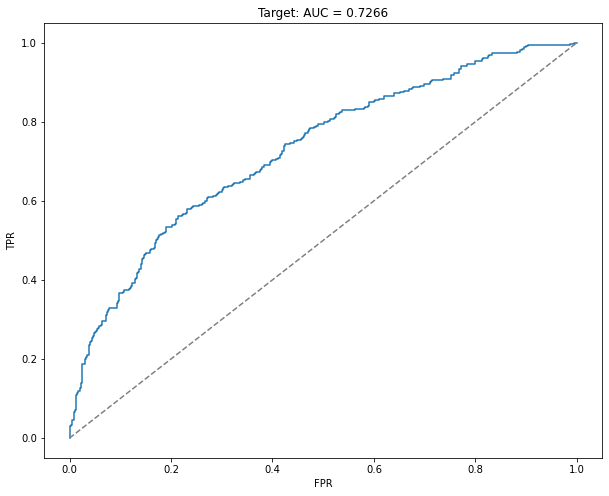

In [122]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
plot_roc(
    y_test, 
    predictions_h1, 
    'Target',
    ax=ax
)

## Random Forrest

In [34]:
df_dummies = pd.get_dummies(df_c, columns=['hist_tip'])

In [39]:
# Checking result
df_dummies.drop("imunofenotip", axis=1, inplace=True)


In [40]:
df_dummies

,dob,velicina_mm,gradus,er,pr,her2,ki67,Target,hist_tip_Casapokrinomdiferencijacijom,hist_tip_Casmedularnimkarakteristikama,hist_tip_NOSinvazivnikarcinom,hist_tip_drugirijetkitipovi,hist_tip_kribriformniinvazivni,hist_tip_lobularniinvazivni,hist_tip_metaplastičnikarcinom,hist_tip_mikroinvazivnikarcinom,hist_tip_mikropapilarniinvazivnikarcinom,hist_tip_mucinozniinvazivni,hist_tip_tubularniinvazivni
0,61,0.8,2,95.0,70,0,95.0,0,0,0,1,0,0,0,0,0,0,0,0
1,75,1.8,2,100.0,100,3,35.0,1,0,0,1,0,0,0,0,0,0,0,0
2,65,1.2,2,100.0,15,3,20.0,0,0,0,1,0,0,0,0,0,0,0,0
3,71,3.0,2,85.0,3,2,35.0,1,0,0,1,0,0,0,0,0,0,0,0
4,82,3.0,2,0.0,0,0,50.0,1,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9957,43,0.5,2,100.0,35,1,42.0,1,0,0,1,0,0,0,0,0,0,0,0
9958,66,4.8,2,100.0,90,0,44.0,1,0,0,1,0,0,0,0,0,0,0,0
9959,57,0.8,2,25.0,25,1,34.0,1,0,0,1,0,0,0,0,0,0,0,0
9960,46,1.6,2,100.0,1,0,42.0,1,0,0,1,0,0,0,0,0,0,0,0


In [41]:
# New train test split after encoding categorical variables
X_train, X_test, y_train, y_test = train_test_split(df_dummies.drop("Target", axis=1), y, test_size = 0.1, random_state=68, stratify=y)

In [42]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [43]:
y_pred = clf.predict_proba(X_test)

y_pred= y_pred[:,1].reshape(-1,1)

y_pred

array([[0.48246506],
       [0.33545081],
       [0.33801283],
       [0.47907013],
       [0.37016736],
       [0.49059538],
       [0.31496295],
       [0.36154947],
       [0.24933761],
       [0.26839083],
       [0.32793969],
       [0.47982887],
       [0.37350681],
       [0.33793241],
       [0.32501809],
       [0.3026691 ],
       [0.33091064],
       [0.31720919],
       [0.35223546],
       [0.3102294 ],
       [0.26345645],
       [0.35505067],
       [0.47798605],
       [0.33089898],
       [0.48661283],
       [0.47994722],
       [0.27593629],
       [0.42170839],
       [0.48067679],
       [0.34427138],
       [0.34188196],
       [0.34733539],
       [0.29772069],
       [0.35484746],
       [0.33785935],
       [0.4832179 ],
       [0.33287131],
       [0.48684547],
       [0.33914589],
       [0.28327043],
       [0.33700108],
       [0.44809212],
       [0.31303641],
       [0.23583672],
       [0.47374919],
       [0.33405203],
       [0.48318789],
       [0.326

In [44]:
roc_auc_score(y_test, y_pred)

0.7017212645174731

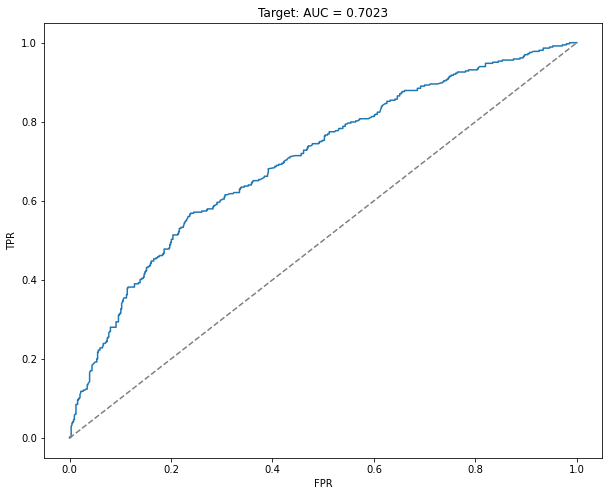

In [86]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
plot_roc(
    y_test, 
    y_pred, 
    'Target',
    ax=ax
)

In [88]:
from sklearn.model_selection import GridSearchCV

n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(clf, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


In [90]:
bestF.best_params_

{'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [91]:
# find best model score
bestF.score(X_train, y_train)

0.9994422755158952

In [55]:
# Optimization n_2
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.ensemble import BalancedRandomForestClassifier
# parameter grid
pgrid = {    
    'max_depth' : [101],    
    'min_samples_split' : [3,4,10],
    'min_samples_leaf' : [1,2],
    'class_weight': ['balanced','balanced_subsample']
}

# specifying the cv
cv_skf = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

# specifying the model 
rfgs = BalancedRandomForestClassifier(n_jobs=-1)



# specify the grid search cv
cv = HalvingGridSearchCV(estimator=rfgs,param_grid=pgrid,cv=cv_skf,n_jobs=-1,verbose=10, scoring='accuracy',random_state=0)

cc= cv.fit(X_train,y_train)

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 996
max_resources_: 8965
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 12
n_resources: 996
Fitting 5 folds for each of 12 candidates, totalling 60 fits
----------
iter: 1
n_candidates: 4
n_resources: 2988
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 2
n_candidates: 2
n_resources: 8964
Fitting 5 folds for each of 2 candidates, totalling 10 fits


In [56]:
cc.best_params_

{'class_weight': 'balanced_subsample',
 'max_depth': 101,
 'min_samples_leaf': 1,
 'min_samples_split': 3}

In [58]:
# Running the optimized randomforrest
clf_optimized = RandomForestClassifier(max_depth=101, min_samples_leaf=1, n_estimators=1000, min_samples_split=3, random_state=68,
                                      class_weight="balanced_subsample")
clf_optimized.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=101,
                       min_samples_split=3, n_estimators=1000, random_state=68)

In [59]:
y_pred_o = clf_optimized.predict_proba(X_test)

y_pred_o= y_pred_o[:,1].reshape(-1,1)

y_pred_o

array([[0.47781035],
       [0.21470239],
       [0.31865789],
       [0.22634013],
       [0.53256391],
       [0.40931774],
       [0.16133115],
       [0.53534148],
       [0.06675019],
       [0.16562102],
       [0.11566015],
       [0.35413294],
       [0.66904267],
       [0.25764581],
       [0.66158557],
       [0.06331111],
       [0.25314214],
       [0.49114483],
       [0.43412373],
       [0.25131745],
       [0.12499953],
       [0.06461501],
       [0.71880435],
       [0.19025042],
       [0.87504068],
       [0.58388149],
       [0.21219333],
       [0.36279107],
       [0.74223456],
       [0.14384646],
       [0.12159161],
       [0.61681778],
       [0.13802103],
       [0.5199808 ],
       [0.19171416],
       [0.75719052],
       [0.20289034],
       [0.35502882],
       [0.45167658],
       [0.1182791 ],
       [0.47721735],
       [0.65802203],
       [0.24926837],
       [0.07247558],
       [0.80935973],
       [0.37092421],
       [0.401228  ],
       [0.465

In [60]:
roc_auc_score(y_test, y_pred_o)

0.8192585455618633

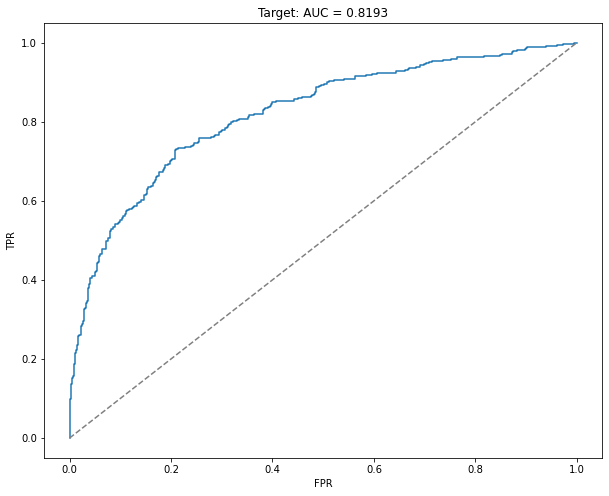

In [71]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
plot_roc(
    y_test, 
    y_pred_o, 
    'Target',
    ax=ax
)

In [61]:
# Stratified Shuffle Split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedShuffleSplit
X= df_dummies.drop("Target", axis=1)

# use StratifiedShuffleSplit()
sss = StratifiedShuffleSplit(n_splits=4, test_size=0.5,
                             random_state=0)
sss.get_n_splits(X, y)

4

In [112]:
X

,dob pri dg,velicina_tumora (mm),gradus,er,pr,her2,ki67,histoloski_tip_txt_Ca s apokrinom diferencijacijom,histoloski_tip_txt_Ca s medularnim karakteristikama,histoloski_tip_txt_NOS_invazivni,histoloski_tip_txt_drugi rijetki tipovi,histoloski_tip_txt_kribriformni invazivni,histoloski_tip_txt_lobularni invazivni,histoloski_tip_txt_metaplastični karcinom,histoloski_tip_txt_mikroinvazivni karcinom,histoloski_tip_txt_mikropapilarni invazivni karcinom,histoloski_tip_txt_mucinozni invazivni,histoloski_tip_txt_tubularni invazivni
0,61.0,0.8,2.0,95.0,70.0,0.0,95.0,0,0,1,0,0,0,0,0,0,0,0
1,75.0,1.8,2.0,100.0,100.0,3.0,35.0,0,0,1,0,0,0,0,0,0,0,0
2,65.0,1.2,2.0,100.0,15.0,3.0,20.0,0,0,1,0,0,0,0,0,0,0,0
3,71.0,3.0,2.0,85.0,3.0,2.0,35.0,0,0,1,0,0,0,0,0,0,0,0
4,82.0,3.0,2.0,0.0,0.0,0.0,50.0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9957,43.0,0.5,2.0,100.0,35.0,1.0,42.0,0,0,1,0,0,0,0,0,0,0,0
9958,66.0,4.8,2.0,100.0,90.0,0.0,44.0,0,0,1,0,0,0,0,0,0,0,0
9959,57.0,0.8,2.0,25.0,25.0,1.0,34.0,0,0,1,0,0,0,0,0,0,0,0
9960,46.0,1.6,2.0,100.0,1.0,0.0,42.0,0,0,1,0,0,0,0,0,0,0,0


In [115]:
scores = []
 
rf = RandomForestClassifier(n_estimators=40, max_depth=7)
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    rf.fit(X_train, y_train)
    pred = rf.predict(X_test)
    scores.append(accuracy_score(y_test, pred))
 

print(scores)

KeyError: "None of [Int64Index([5460, 4130, 5045, 6696, 4015, 9571, 2139, 9211, 6454, 1654,\n            ...\n            7677, 5260, 2767, 3910, 5687, 3015, 1039, 7994, 8198, 7234],\n           dtype='int64', length=4981)] are in the [columns]"

In [129]:
df2 = df_c[df_c['histoloski_tip_txt'].isin(df_c['histoloski_tip_txt'].value_counts()[df_c['histoloski_tip_txt'].value_counts()>2].index)]

In [130]:
df2

,dob pri dg,velicina_tumora (mm),histoloski_tip_txt,gradus,er,pr,her2,ki67,imunofenotip_txt,Target
0,61.0,0.8,NOS_invazivni,2.0,95.0,70.0,0.0,95.0,luminal B,0
1,75.0,1.8,NOS_invazivni,2.0,100.0,100.0,3.0,35.0,Luminal B HER2poz,1
2,65.0,1.2,NOS_invazivni,2.0,100.0,15.0,3.0,20.0,Luminal B HER2poz,0
3,71.0,3.0,NOS_invazivni,2.0,85.0,3.0,2.0,35.0,luminal B,1
4,82.0,3.0,NOS_invazivni,2.0,0.0,0.0,0.0,50.0,trostruko negativni,1
...,...,...,...,...,...,...,...,...,...,...
9957,43.0,0.5,NOS_invazivni,2.0,100.0,35.0,1.0,42.0,luminal B,1
9958,66.0,4.8,NOS_invazivni,2.0,100.0,90.0,0.0,44.0,luminal B,1
9959,57.0,0.8,NOS_invazivni,2.0,25.0,25.0,1.0,34.0,luminal B,1
9960,46.0,1.6,NOS_invazivni,2.0,100.0,1.0,0.0,42.0,luminal B,1


In [127]:
df2.drop("Unnamed: 0",axis=1,inplace=True)

<ipython-input-127-e83e23ac2ba4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop("Unnamed: 0",axis=1,inplace=True)


In [137]:
X2_train, X2_test, y2_train, y2_test = train_test_split(df2.drop("Target",axis=1), y, test_size=0.15, random_state=42, stratify=df2['histoloski_tip_txt'])

In [138]:
# Picking categorical columns
categorical_features_indices = np.where(X2_train.dtypes != float)[0]

In [139]:
train_dataset = cb.Pool(data=X2_train,
                     label=y2_train,
                     cat_features = categorical_features_indices) 
test_dataset = cb.Pool(X2_test, y2_test,cat_features = categorical_features_indices)

In [140]:
sampler = optuna.samplers.TPESampler(seed=5)  # Make the sampler behave in a deterministic way.
study = optuna.create_study(direction="maximize", sampler=sampler)
study.optimize(objective, n_trials=150)

[I 2022-08-25 15:03:51,854] A new study created in memory with name: no-name-1ddd9b52-7525-4fac-a9ad-7762469ffe6f
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(


Training on fold [0/5]

bestTest = 0.6215220222
bestIteration = 196

Training on fold [1/5]

bestTest = 0.6098802618
bestIteration = 162

Training on fold [2/5]

bestTest = 0.6175037377
bestIteration = 208

Training on fold [3/5]

bestTest = 0.6186409766
bestIteration = 195

Training on fold [4/5]


[I 2022-08-25 15:03:53,571] Trial 0 finished with value: 0.7159005904884227 and parameters: {'iterations': 500, 'learning_rate': 0.057128647369714236, 'random_strength': 1, 'bagging_temperature': 8, 'max_bin': 6, 'grow_policy': 'Depthwise', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 7.028437810203034e-06, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 0 with value: 0.7159005904884227.



bestTest = 0.6181869601
bestIteration = 151

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6139754719
bestIteration = 164

Training on fold [1/5]

bestTest = 0.596461673
bestIteration = 383

Training on fold [2/5]

bestTest = 0.6085383265
bestIteration = 276

Training on fold [3/5]

bestTest = 0.6120109593
bestIteration = 232

Training on fold [4/5]


[I 2022-08-25 15:04:06,193] Trial 1 finished with value: 0.7149907293221613 and parameters: {'iterations': 1500, 'learning_rate': 0.07847018132692062, 'random_strength': 9, 'bagging_temperature': 9, 'max_bin': 8, 'grow_policy': 'SymmetricTree', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 7.332581251077417e-08, 'one_hot_max_size': 12, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 0 with value: 0.7159005904884227.



bestTest = 0.6182154493
bestIteration = 103

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6155195658
bestIteration = 99

Training on fold [1/5]

bestTest = 0.6100424209
bestIteration = 99

Training on fold [2/5]

bestTest = 0.6132906889
bestIteration = 99

Training on fold [3/5]

bestTest = 0.6182771476
bestIteration = 99

Training on fold [4/5]


[I 2022-08-25 15:04:11,343] Trial 2 finished with value: 0.7108456465938179 and parameters: {'iterations': 100, 'learning_rate': 0.05741165300213927, 'random_strength': 4, 'bagging_temperature': 2, 'max_bin': 30, 'grow_policy': 'Depthwise', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 1.0192312448477406e-07, 'one_hot_max_size': 12, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 0 with value: 0.7159005904884227.



bestTest = 0.6171089161
bestIteration = 96

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6141503379
bestIteration = 398

Training on fold [1/5]

bestTest = 0.5963939351
bestIteration = 988

Training on fold [2/5]

bestTest = 0.6069717656
bestIteration = 767

Training on fold [3/5]

bestTest = 0.6069775903
bestIteration = 894

Training on fold [4/5]


[I 2022-08-25 15:05:04,674] Trial 3 finished with value: 0.7178048182073867 and parameters: {'iterations': 1300, 'learning_rate': 0.017134668541398907, 'random_strength': 2, 'bagging_temperature': 4, 'max_bin': 10, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 0.0405923233680353, 'one_hot_max_size': 10, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 3 with value: 0.7178048182073867.



bestTest = 0.6129311561
bestIteration = 427

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6113168774
bestIteration = 111

Training on fold [1/5]

bestTest = 0.5948993784
bestIteration = 244

Training on fold [2/5]

bestTest = 0.6057662055
bestIteration = 179

Training on fold [3/5]

bestTest = 0.6040889199
bestIteration = 232

Training on fold [4/5]


[I 2022-08-25 15:05:06,284] Trial 4 finished with value: 0.7205146508581486 and parameters: {'iterations': 1500, 'learning_rate': 0.08000727398765399, 'random_strength': 1, 'bagging_temperature': 2, 'max_bin': 10, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 0.005125688016017658, 'one_hot_max_size': 100, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 4 with value: 0.7205146508581486.



bestTest = 0.6093301428
bestIteration = 123

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6222142195
bestIteration = 51

Training on fold [1/5]

bestTest = 0.6046660688
bestIteration = 102

Training on fold [2/5]

bestTest = 0.6144607332
bestIteration = 81

Training on fold [3/5]

bestTest = 0.6147833222
bestIteration = 100

Training on fold [4/5]


[I 2022-08-25 15:05:10,996] Trial 5 finished with value: 0.718355279180274 and parameters: {'iterations': 700, 'learning_rate': 0.28840213091206046, 'random_strength': 8, 'bagging_temperature': 5, 'max_bin': 10, 'grow_policy': 'SymmetricTree', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 0.0006017458461802345, 'one_hot_max_size': 5, 'auto_class_weights': 'Balanced'}. Best is trial 4 with value: 0.7205146508581486.



bestTest = 0.6196620006
bestIteration = 56

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6139060771
bestIteration = 85

Training on fold [1/5]

bestTest = 0.598578683
bestIteration = 99

Training on fold [2/5]

bestTest = 0.6094861574
bestIteration = 99

Training on fold [3/5]

bestTest = 0.6103667499
bestIteration = 77

Training on fold [4/5]


[I 2022-08-25 15:05:17,509] Trial 6 finished with value: 0.7162368300087208 and parameters: {'iterations': 100, 'learning_rate': 0.23343721639392573, 'random_strength': 7, 'bagging_temperature': 3, 'max_bin': 6, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 0.017682540913767256, 'one_hot_max_size': 10, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 4 with value: 0.7205146508581486.



bestTest = 0.6065048458
bestIteration = 85

Training on fold [0/5]

bestTest = 0.6209952824
bestIteration = 36

Training on fold [1/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6080488521
bestIteration = 68

Training on fold [2/5]

bestTest = 0.6169469019
bestIteration = 62

Training on fold [3/5]


[I 2022-08-25 15:05:18,148] Trial 7 finished with value: 0.7158185798187108 and parameters: {'iterations': 100, 'learning_rate': 0.24377131327566987, 'random_strength': 2, 'bagging_temperature': 1, 'max_bin': 6, 'grow_policy': 'Depthwise', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 0.0009334767397996896, 'one_hot_max_size': 100, 'auto_class_weights': 'Balanced'}. Best is trial 4 with value: 0.7205146508581486.



bestTest = 0.6184891813
bestIteration = 79

Training on fold [4/5]

bestTest = 0.6161544475
bestIteration = 51

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6243023771
bestIteration = 71

Training on fold [1/5]

bestTest = 0.6049857703
bestIteration = 240

Training on fold [2/5]

bestTest = 0.6152088947
bestIteration = 151

Training on fold [3/5]

bestTest = 0.6165533821
bestIteration = 226

Training on fold [4/5]


[I 2022-08-25 15:05:29,967] Trial 8 finished with value: 0.7166524566101133 and parameters: {'iterations': 1300, 'learning_rate': 0.08026868780709238, 'random_strength': 1, 'bagging_temperature': 6, 'max_bin': 10, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 0.007620722139832508, 'one_hot_max_size': 5, 'auto_class_weights': 'Balanced'}. Best is trial 4 with value: 0.7205146508581486.



bestTest = 0.6224146784
bestIteration = 102

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6217775087
bestIteration = 80

Training on fold [1/5]

bestTest = 0.6093594383
bestIteration = 146

Training on fold [2/5]

bestTest = 0.6191367319
bestIteration = 113

Training on fold [3/5]

bestTest = 0.6197269358
bestIteration = 111

Training on fold [4/5]


[I 2022-08-25 15:05:38,422] Trial 9 finished with value: 0.7141113557027532 and parameters: {'iterations': 1300, 'learning_rate': 0.13474573604398465, 'random_strength': 1, 'bagging_temperature': 3, 'max_bin': 6, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 41.08476065883486, 'one_hot_max_size': 12, 'auto_class_weights': 'Balanced'}. Best is trial 4 with value: 0.7205146508581486.



bestTest = 0.6212259131
bestIteration = 93

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6127169087
bestIteration = 94

Training on fold [1/5]

bestTest = 0.5997761579
bestIteration = 117

Training on fold [2/5]

bestTest = 0.6105707698
bestIteration = 100

Training on fold [3/5]


[I 2022-08-25 15:05:39,520] Trial 10 finished with value: 0.7144706934888324 and parameters: {'iterations': 200, 'learning_rate': 0.15347182690089853, 'random_strength': 5, 'bagging_temperature': 1, 'max_bin': 5, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 6.829171119690581, 'one_hot_max_size': 100, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 4 with value: 0.7205146508581486.



bestTest = 0.6123812475
bestIteration = 106

Training on fold [4/5]

bestTest = 0.6112281958
bestIteration = 64

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6197023257
bestIteration = 47

Training on fold [1/5]

bestTest = 0.603070835
bestIteration = 134

Training on fold [2/5]

bestTest = 0.6109430963
bestIteration = 157

Training on fold [3/5]



[I 2022-08-25 15:05:40,448] Trial 11 finished with value: 0.7194257927674949 and parameters: {'iterations': 700, 'learning_rate': 0.2935372857408073, 'random_strength': 10, 'bagging_temperature': 6, 'max_bin': 20, 'grow_policy': 'SymmetricTree', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 7.261999689269002e-05, 'one_hot_max_size': 1024, 'auto_class_weights': 'Balanced'}. Best is trial 4 with value: 0.7205146508581486.


bestTest = 0.6127352571
bestIteration = 103

Training on fold [4/5]

bestTest = 0.6187175332
bestIteration = 49

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6152540632
bestIteration = 51

Training on fold [1/5]

bestTest = 0.5960559374
bestIteration = 125

Training on fold [2/5]

bestTest = 0.607207859
bestIteration = 103

Training on fold [3/5]


[I 2022-08-25 15:05:41,389] Trial 12 finished with value: 0.7183077175919428 and parameters: {'iterations': 700, 'learning_rate': 0.1592692839194838, 'random_strength': 10, 'bagging_temperature': 7, 'max_bin': 20, 'grow_policy': 'SymmetricTree', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 1.3569178646187832e-05, 'one_hot_max_size': 1024, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 4 with value: 0.7205146508581486.



bestTest = 0.6079827902
bestIteration = 131

Training on fold [4/5]

bestTest = 0.609331039
bestIteration = 91



C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(


Training on fold [0/5]

bestTest = 0.62048736
bestIteration = 88

Training on fold [1/5]

bestTest = 0.6076906753
bestIteration = 108

Training on fold [2/5]

bestTest = 0.6175913318
bestIteration = 119

Training on fold [3/5]



[I 2022-08-25 15:05:42,361] Trial 13 finished with value: 0.7170220708219907 and parameters: {'iterations': 1500, 'learning_rate': 0.18948088647938427, 'random_strength': 4, 'bagging_temperature': 0, 'max_bin': 4, 'grow_policy': 'SymmetricTree', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 0.6221070814409305, 'one_hot_max_size': 1024, 'auto_class_weights': 'Balanced'}. Best is trial 4 with value: 0.7205146508581486.


bestTest = 0.6189663543
bestIteration = 97

Training on fold [4/5]

bestTest = 0.6159775664
bestIteration = 94



C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(


Training on fold [0/5]

bestTest = 0.6189869472
bestIteration = 135

Training on fold [1/5]

bestTest = 0.6027894953
bestIteration = 210

Training on fold [2/5]

bestTest = 0.6123170317
bestIteration = 182

Training on fold [3/5]

bestTest = 0.611942402
bestIteration = 229

Training on fold [4/5]


[I 2022-08-25 15:05:43,905] Trial 14 finished with value: 0.7212784138432413 and parameters: {'iterations': 300, 'learning_rate': 0.11141445879846285, 'random_strength': 7, 'bagging_temperature': 10, 'max_bin': 20, 'grow_policy': 'SymmetricTree', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 3.9777317429405287e-05, 'one_hot_max_size': 100, 'auto_class_weights': 'Balanced'}. Best is trial 14 with value: 0.7212784138432413.



bestTest = 0.6168980091
bestIteration = 136

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.610325444
bestIteration = 116

Training on fold [1/5]

bestTest = 0.5946519288
bestIteration = 187

Training on fold [2/5]

bestTest = 0.6067153362
bestIteration = 121

Training on fold [3/5]

bestTest = 0.6095174094
bestIteration = 152

Training on fold [4/5]


[I 2022-08-25 15:05:45,216] Trial 15 finished with value: 0.7174968129688285 and parameters: {'iterations': 300, 'learning_rate': 0.11591619663425676, 'random_strength': 6, 'bagging_temperature': 10, 'max_bin': 20, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 3.5278469533528857e-06, 'one_hot_max_size': 100, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 14 with value: 0.7212784138432413.



bestTest = 0.6111937423
bestIteration = 114

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6121890054
bestIteration = 114

Training on fold [1/5]

bestTest = 0.5989624358
bestIteration = 159

Training on fold [2/5]

bestTest = 0.6097990192
bestIteration = 172

Training on fold [3/5]

bestTest = 0.613098078
bestIteration = 125

Training on fold [4/5]


[I 2022-08-25 15:05:46,450] Trial 16 finished with value: 0.7150652830070376 and parameters: {'iterations': 300, 'learning_rate': 0.11343401099847632, 'random_strength': 7, 'bagging_temperature': 10, 'max_bin': 4, 'grow_policy': 'SymmetricTree', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 0.18504855379850307, 'one_hot_max_size': 100, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 14 with value: 0.7212784138432413.



bestTest = 0.6099611577
bestIteration = 118

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6240569902
bestIteration = 515

Training on fold [1/5]

bestTest = 0.6085459364
bestIteration = 999

Training on fold [2/5]

bestTest = 0.6170926513
bestIteration = 916

Training on fold [3/5]

bestTest = 0.6184971542
bestIteration = 999

Training on fold [4/5]


[I 2022-08-25 15:05:53,161] Trial 17 finished with value: 0.7173350059531534 and parameters: {'iterations': 1000, 'learning_rate': 0.012273551132708102, 'random_strength': 4, 'bagging_temperature': 4, 'max_bin': 30, 'grow_policy': 'SymmetricTree', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 7.750418001412586e-05, 'one_hot_max_size': 100, 'auto_class_weights': 'Balanced'}. Best is trial 14 with value: 0.7212784138432413.



bestTest = 0.6190364806
bestIteration = 906

Training on fold [0/5]



C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(


bestTest = 0.6209368811
bestIteration = 66

Training on fold [1/5]

bestTest = 0.6007751403
bestIteration = 137

Training on fold [2/5]

bestTest = 0.6150519913
bestIteration = 113

Training on fold [3/5]



[I 2022-08-25 15:05:54,168] Trial 18 finished with value: 0.7195163649942978 and parameters: {'iterations': 1200, 'learning_rate': 0.19107100410531164, 'random_strength': 6, 'bagging_temperature': 0, 'max_bin': 8, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 1.291959873666151e-08, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 14 with value: 0.7212784138432413.


bestTest = 0.6202602941
bestIteration = 84

Training on fold [4/5]

bestTest = 0.6159732267
bestIteration = 67

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6138395787
bestIteration = 106

Training on fold [1/5]

bestTest = 0.597599858
bestIteration = 163

Training on fold [2/5]

bestTest = 0.609505731
bestIteration = 157

Training on fold [3/5]

bestTest = 0.6095160621
bestIteration = 173

Training on fold [4/5]


[I 2022-08-25 15:05:55,504] Trial 19 finished with value: 0.715872616741569 and parameters: {'iterations': 1500, 'learning_rate': 0.09716474191462941, 'random_strength': 3, 'bagging_temperature': 8, 'max_bin': 5, 'grow_policy': 'Depthwise', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 5.689920572929397e-07, 'one_hot_max_size': 100, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 14 with value: 0.7212784138432413.



bestTest = 0.6094359821
bestIteration = 118

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.61686164
bestIteration = 175

Training on fold [1/5]

bestTest = 0.5992722967
bestIteration = 299

Training on fold [2/5]

bestTest = 0.6086908352
bestIteration = 299

Training on fold [3/5]

bestTest = 0.6098992175
bestIteration = 299

Training on fold [4/5]


[I 2022-08-25 15:05:57,856] Trial 20 finished with value: 0.716840038238805 and parameters: {'iterations': 300, 'learning_rate': 0.04288338363789505, 'random_strength': 8, 'bagging_temperature': 2, 'max_bin': 10, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 0.0026554075773990056, 'one_hot_max_size': 100, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 14 with value: 0.7212784138432413.



bestTest = 0.6102163843
bestIteration = 296

Training on fold [0/5]

bestTest = 0.6266921397
bestIteration = 41

Training on fold [1/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6013316822
bestIteration = 157

Training on fold [2/5]

bestTest = 0.6134829925
bestIteration = 122

Training on fold [3/5]

bestTest = 0.6211994235
bestIteration = 67

Training on fold [4/5]


[I 2022-08-25 15:05:58,806] Trial 21 finished with value: 0.7165072226980829 and parameters: {'iterations': 1200, 'learning_rate': 0.19430736545157593, 'random_strength': 6, 'bagging_temperature': 0, 'max_bin': 8, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 1.8321928873421644e-08, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 14 with value: 0.7212784138432413.



bestTest = 0.6219447992
bestIteration = 71

Training on fold [0/5]

bestTest = 0.6235923216
bestIteration = 66

Training on fold [1/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6039982476
bestIteration = 107

Training on fold [2/5]

bestTest = 0.6145787719
bestIteration = 116

Training on fold [3/5]

bestTest = 0.6236154611
bestIteration = 65

Training on fold [4/5]


[I 2022-08-25 15:05:59,754] Trial 22 finished with value: 0.7179847461544675 and parameters: {'iterations': 1200, 'learning_rate': 0.1793060086846407, 'random_strength': 5, 'bagging_temperature': 1, 'max_bin': 8, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 0.00016129669660306907, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 14 with value: 0.7212784138432413.



bestTest = 0.6153530892
bestIteration = 100

Training on fold [0/5]

bestTest = 0.6173971084


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(


bestIteration = 83

Training on fold [1/5]

bestTest = 0.6022689731
bestIteration = 128

Training on fold [2/5]

bestTest = 0.6051149403
bestIteration = 152

Training on fold [3/5]

bestTest = 0.6140568531
bestIteration = 75


[I 2022-08-25 15:06:00,821] Trial 23 finished with value: 0.7220458135106365 and parameters: {'iterations': 1200, 'learning_rate': 0.2281582248033122, 'random_strength': 7, 'bagging_temperature': 0, 'max_bin': 20, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 8.779877777560969e-07, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 23 with value: 0.7220458135106365.



Training on fold [4/5]

bestTest = 0.6172568741
bestIteration = 74



C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(


Training on fold [0/5]

bestTest = 0.6214840126
bestIteration = 60

Training on fold [1/5]

bestTest = 0.6021975144
bestIteration = 85

Training on fold [2/5]

bestTest = 0.6149133033
bestIteration = 96

Training on fold [3/5]

bestTest = 0.6166669392
bestIteration = 74

Training on fold [4/5]


[I 2022-08-25 15:06:01,785] Trial 24 finished with value: 0.7194290479927632 and parameters: {'iterations': 500, 'learning_rate': 0.22432777112507668, 'random_strength': 8, 'bagging_temperature': 2, 'max_bin': 20, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 1.8291099700275639e-06, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 23 with value: 0.7220458135106365.



bestTest = 0.6157744836
bestIteration = 115

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6170818372
bestIteration = 125

Training on fold [1/5]

bestTest = 0.6027131541
bestIteration = 199

Training on fold [2/5]

bestTest = 0.6109043189
bestIteration = 190

Training on fold [3/5]

bestTest = 0.6129728311
bestIteration = 189

Training on fold [4/5]



[I 2022-08-25 15:06:03,225] Trial 25 finished with value: 0.7207299202259799 and parameters: {'iterations': 200, 'learning_rate': 0.13066383046777963, 'random_strength': 7, 'bagging_temperature': 3, 'max_bin': 20, 'grow_policy': 'SymmetricTree', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 4.4690997388085776e-07, 'one_hot_max_size': 100, 'auto_class_weights': 'Balanced'}. Best is trial 23 with value: 0.7220458135106365.


bestTest = 0.6184629489
bestIteration = 96

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6283902267
bestIteration = 51

Training on fold [1/5]

bestTest = 0.6054135718
bestIteration = 197

Training on fold [2/5]

bestTest = 0.6161366268
bestIteration = 123

Training on fold [3/5]

bestTest = 0.6175534694
bestIteration = 157

Training on fold [4/5]


[I 2022-08-25 15:06:10,266] Trial 26 finished with value: 0.7157142474886073 and parameters: {'iterations': 200, 'learning_rate': 0.125902758901557, 'random_strength': 7, 'bagging_temperature': 5, 'max_bin': 20, 'grow_policy': 'SymmetricTree', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 4.4242055364500485e-07, 'one_hot_max_size': 5, 'auto_class_weights': 'Balanced'}. Best is trial 23 with value: 0.7220458135106365.



bestTest = 0.6209541158
bestIteration = 103

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6189885383
bestIteration = 54

Training on fold [1/5]

bestTest = 0.6064517141
bestIteration = 96

Training on fold [2/5]

bestTest = 0.6130688696
bestIteration = 134

Training on fold [3/5]

bestTest = 0.6175667216
bestIteration = 81

Training on fold [4/5]


[I 2022-08-25 15:06:15,467] Trial 27 finished with value: 0.7180208777764499 and parameters: {'iterations': 200, 'learning_rate': 0.26322302423191424, 'random_strength': 9, 'bagging_temperature': 4, 'max_bin': 20, 'grow_policy': 'SymmetricTree', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 1.553437273878652e-05, 'one_hot_max_size': 10, 'auto_class_weights': 'Balanced'}. Best is trial 23 with value: 0.7220458135106365.



bestTest = 0.6193279527
bestIteration = 87

Training on fold [0/5]

bestTest = 0.6205478387
bestIteration = 57

Training on fold [1/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.605874445
bestIteration = 93

Training on fold [2/5]

bestTest = 0.6089363974
bestIteration = 134

Training on fold [3/5]

bestTest = 0.6147701829
bestIteration = 112



[I 2022-08-25 15:06:16,359] Trial 28 finished with value: 0.7199873947643441 and parameters: {'iterations': 1000, 'learning_rate': 0.21597241643033235, 'random_strength': 7, 'bagging_temperature': 6, 'max_bin': 20, 'grow_policy': 'SymmetricTree', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 5.605926172015728e-07, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 23 with value: 0.7220458135106365.


Training on fold [4/5]

bestTest = 0.6172509296
bestIteration = 74

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6229540127
bestIteration = 80

Training on fold [1/5]

bestTest = 0.6022384124
bestIteration = 190

Training on fold [2/5]

bestTest = 0.615093652
bestIteration = 91

Training on fold [3/5]

bestTest = 0.6165049241
bestIteration = 117

Training on fold [4/5]


[I 2022-08-25 15:06:17,487] Trial 29 finished with value: 0.7169568222690182 and parameters: {'iterations': 500, 'learning_rate': 0.1672562435458063, 'random_strength': 9, 'bagging_temperature': 8, 'max_bin': 20, 'grow_policy': 'Depthwise', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 9.253357408565145e-06, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 23 with value: 0.7220458135106365.



bestTest = 0.6179231076
bestIteration = 136

Training on fold [0/5]

bestTest = 0.6182409192


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(


bestIteration = 87

Training on fold [1/5]

bestTest = 0.6051774242
bestIteration = 109

Training on fold [2/5]

bestTest = 0.6142806042
bestIteration = 76

Training on fold [3/5]


[I 2022-08-25 15:06:18,291] Trial 30 finished with value: 0.7180349760491649 and parameters: {'iterations': 1200, 'learning_rate': 0.20932018063531974, 'random_strength': 8, 'bagging_temperature': 9, 'max_bin': 20, 'grow_policy': 'SymmetricTree', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 2.1346123938994824e-07, 'one_hot_max_size': 100, 'auto_class_weights': 'Balanced'}. Best is trial 23 with value: 0.7220458135106365.



bestTest = 0.6173520485
bestIteration = 80

Training on fold [4/5]

bestTest = 0.6199637225
bestIteration = 66

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6229587579
bestIteration = 128

Training on fold [1/5]

bestTest = 0.6039838078
bestIteration = 209

Training on fold [2/5]

bestTest = 0.6148863299
bestIteration = 157

Training on fold [3/5]

bestTest = 0.6152767804
bestIteration = 194

Training on fold [4/5]


[I 2022-08-25 15:06:19,862] Trial 31 finished with value: 0.7186693177848789 and parameters: {'iterations': 1500, 'learning_rate': 0.0952909684875763, 'random_strength': 6, 'bagging_temperature': 3, 'max_bin': 10, 'grow_policy': 'SymmetricTree', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 2.73014003818662e-06, 'one_hot_max_size': 100, 'auto_class_weights': 'Balanced'}. Best is trial 23 with value: 0.7220458135106365.



bestTest = 0.6167162304
bestIteration = 178

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6190310603
bestIteration = 121

Training on fold [1/5]

bestTest = 0.6007753471
bestIteration = 182

Training on fold [2/5]

bestTest = 0.6135485412
bestIteration = 111

Training on fold [3/5]

bestTest = 0.6154508938
bestIteration = 150

Training on fold [4/5]


[I 2022-08-25 15:06:21,205] Trial 32 finished with value: 0.7203315030291735 and parameters: {'iterations': 300, 'learning_rate': 0.135912044475973, 'random_strength': 5, 'bagging_temperature': 1, 'max_bin': 20, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 2.7778146262018323e-05, 'one_hot_max_size': 100, 'auto_class_weights': 'Balanced'}. Best is trial 23 with value: 0.7220458135106365.



bestTest = 0.615324807
bestIteration = 132

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6104017457
bestIteration = 156

Training on fold [1/5]

bestTest = 0.5955679756
bestIteration = 197

Training on fold [2/5]

bestTest = 0.6052263064
bestIteration = 198

Training on fold [3/5]

bestTest = 0.606638962
bestIteration = 198

Training on fold [4/5]


[I 2022-08-25 15:06:22,740] Trial 33 finished with value: 0.718716076913762 and parameters: {'iterations': 200, 'learning_rate': 0.08886739877911005, 'random_strength': 7, 'bagging_temperature': 2, 'max_bin': 30, 'grow_policy': 'Depthwise', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 0.0002520913376016333, 'one_hot_max_size': 100, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 23 with value: 0.7220458135106365.



bestTest = 0.6101614716
bestIteration = 132

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6186408827
bestIteration = 291

Training on fold [1/5]

bestTest = 0.6042617546
bestIteration = 444

Training on fold [2/5]

bestTest = 0.6198577796
bestIteration = 188

Training on fold [3/5]

bestTest = 0.6123496575
bestIteration = 453

Training on fold [4/5]


[I 2022-08-25 15:06:40,168] Trial 34 finished with value: 0.7188209600956285 and parameters: {'iterations': 1500, 'learning_rate': 0.054565097816069635, 'random_strength': 8, 'bagging_temperature': 3, 'max_bin': 20, 'grow_policy': 'SymmetricTree', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 7.08329817011457e-08, 'one_hot_max_size': 12, 'auto_class_weights': 'Balanced'}. Best is trial 23 with value: 0.7220458135106365.



bestTest = 0.6191677208
bestIteration = 307

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.610750577
bestIteration = 187

Training on fold [1/5]

bestTest = 0.5991189302
bestIteration = 199

Training on fold [2/5]

bestTest = 0.6067409566
bestIteration = 198

Training on fold [3/5]

bestTest = 0.6089388224
bestIteration = 199

Training on fold [4/5]


[I 2022-08-25 15:06:41,886] Trial 35 finished with value: 0.7187981655122251 and parameters: {'iterations': 200, 'learning_rate': 0.06000649018192929, 'random_strength': 3, 'bagging_temperature': 2, 'max_bin': 10, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 0.0025862528733863483, 'one_hot_max_size': 100, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 23 with value: 0.7220458135106365.



bestTest = 0.608242251
bestIteration = 182

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6222655095
bestIteration = 156

Training on fold [1/5]

bestTest = 0.606273737
bestIteration = 230

Training on fold [2/5]

bestTest = 0.6196224521
bestIteration = 178

Training on fold [3/5]

bestTest = 0.6209306816
bestIteration = 160

Training on fold [4/5]


[I 2022-08-25 15:06:50,300] Trial 36 finished with value: 0.7135307388280078 and parameters: {'iterations': 1200, 'learning_rate': 0.10696121327644253, 'random_strength': 6, 'bagging_temperature': 5, 'max_bin': 4, 'grow_policy': 'SymmetricTree', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 4.052251182082311e-08, 'one_hot_max_size': 10, 'auto_class_weights': 'Balanced'}. Best is trial 23 with value: 0.7220458135106365.



bestTest = 0.6248055295
bestIteration = 65

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6120914702
bestIteration = 111

Training on fold [1/5]

bestTest = 0.5977151283
bestIteration = 132

Training on fold [2/5]

bestTest = 0.6074633435
bestIteration = 111

Training on fold [3/5]

bestTest = 0.6101549207
bestIteration = 114

Training on fold [4/5]


[I 2022-08-25 15:06:58,682] Trial 37 finished with value: 0.7164252770310089 and parameters: {'iterations': 300, 'learning_rate': 0.14117442238674857, 'random_strength': 7, 'bagging_temperature': 1, 'max_bin': 10, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 0.04598194406053206, 'one_hot_max_size': 12, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 23 with value: 0.7220458135106365.



bestTest = 0.6119521701
bestIteration = 103

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6226631262
bestIteration = 490

Training on fold [1/5]

bestTest = 0.6096928408
bestIteration = 660

Training on fold [2/5]

bestTest = 0.6183565466
bestIteration = 529

Training on fold [3/5]

bestTest = 0.6214461505
bestIteration = 531

Training on fold [4/5]


[I 2022-08-25 15:07:25,364] Trial 38 finished with value: 0.7138664116554487 and parameters: {'iterations': 1500, 'learning_rate': 0.028315734859821556, 'random_strength': 9, 'bagging_temperature': 4, 'max_bin': 5, 'grow_policy': 'Depthwise', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 1.3153557693339244e-06, 'one_hot_max_size': 5, 'auto_class_weights': 'Balanced'}. Best is trial 23 with value: 0.7220458135106365.



bestTest = 0.6226145963
bestIteration = 480

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6159879799
bestIteration = 99

Training on fold [1/5]

bestTest = 0.6059566862
bestIteration = 99

Training on fold [2/5]

bestTest = 0.6140265583
bestIteration = 99

Training on fold [3/5]

bestTest = 0.6167496572
bestIteration = 98

Training on fold [4/5]


[I 2022-08-25 15:07:26,231] Trial 39 finished with value: 0.7111544423216488 and parameters: {'iterations': 100, 'learning_rate': 0.07543163565339313, 'random_strength': 2, 'bagging_temperature': 0, 'max_bin': 6, 'grow_policy': 'SymmetricTree', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 0.0006197641080588051, 'one_hot_max_size': 100, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 23 with value: 0.7220458135106365.



bestTest = 0.6127402672
bestIteration = 98

Training on fold [0/5]

bestTest = 0.6204015412
bestIteration = 49

Training on fold [1/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6068633653
bestIteration = 66

Training on fold [2/5]

bestTest = 0.6127623016
bestIteration = 62

Training on fold [3/5]

bestTest = 0.6179691767
bestIteration = 53

Training on fold [4/5]


[I 2022-08-25 15:07:27,005] Trial 40 finished with value: 0.7181534907122464 and parameters: {'iterations': 1300, 'learning_rate': 0.2732868088303132, 'random_strength': 5, 'bagging_temperature': 3, 'max_bin': 30, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 3.602565029092028e-05, 'one_hot_max_size': 100, 'auto_class_weights': 'Balanced'}. Best is trial 23 with value: 0.7220458135106365.



bestTest = 0.6162790355
bestIteration = 100

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6196448108
bestIteration = 97

Training on fold [1/5]

bestTest = 0.6021930997
bestIteration = 197

Training on fold [2/5]

bestTest = 0.6115666002
bestIteration = 158

Training on fold [3/5]

bestTest = 0.6150809893
bestIteration = 130

Training on fold [4/5]



[I 2022-08-25 15:07:28,290] Trial 41 finished with value: 0.7187891453808086 and parameters: {'iterations': 300, 'learning_rate': 0.1383131454438664, 'random_strength': 3, 'bagging_temperature': 1, 'max_bin': 20, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 3.6417985505147005e-05, 'one_hot_max_size': 100, 'auto_class_weights': 'Balanced'}. Best is trial 23 with value: 0.7220458135106365.


bestTest = 0.6193561867
bestIteration = 86

Training on fold [0/5]

bestTest = 0.6184262023
bestIteration = 67

Training on fold [1/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.604793699
bestIteration = 110

Training on fold [2/5]

bestTest = 0.6091213845
bestIteration = 153

Training on fold [3/5]

bestTest = 0.6166056467
bestIteration = 122

Training on fold [4/5]


[I 2022-08-25 15:07:29,423] Trial 42 finished with value: 0.7205493762088114 and parameters: {'iterations': 300, 'learning_rate': 0.12534455519928545, 'random_strength': 1, 'bagging_temperature': 2, 'max_bin': 20, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 6.442574976032874e-06, 'one_hot_max_size': 100, 'auto_class_weights': 'Balanced'}. Best is trial 23 with value: 0.7220458135106365.



bestTest = 0.6151657891
bestIteration = 105

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6175151664
bestIteration = 150

Training on fold [1/5]

bestTest = 0.602963936
bestIteration = 259

Training on fold [2/5]

bestTest = 0.6127682778
bestIteration = 156

Training on fold [3/5]

bestTest = 0.6158764681
bestIteration = 141

Training on fold [4/5]


[I 2022-08-25 15:07:30,974] Trial 43 finished with value: 0.7196232987725797 and parameters: {'iterations': 300, 'learning_rate': 0.07068715635507385, 'random_strength': 1, 'bagging_temperature': 3, 'max_bin': 20, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 7.129476723966923e-06, 'one_hot_max_size': 100, 'auto_class_weights': 'Balanced'}. Best is trial 23 with value: 0.7220458135106365.



bestTest = 0.6208676073
bestIteration = 116

Training on fold [0/5]

bestTest = 0.6186573237
bestIteration = 62

Training on fold [1/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6060111443
bestIteration = 120

Training on fold [2/5]

bestTest = 0.6113985922
bestIteration = 131

Training on fold [3/5]

bestTest = 0.6193111692
bestIteration = 83

Training on fold [4/5]


[I 2022-08-25 15:07:31,976] Trial 44 finished with value: 0.7179591738866178 and parameters: {'iterations': 300, 'learning_rate': 0.1219963829929096, 'random_strength': 1, 'bagging_temperature': 2, 'max_bin': 20, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 2.1314145027629686e-07, 'one_hot_max_size': 1024, 'auto_class_weights': 'Balanced'}. Best is trial 23 with value: 0.7220458135106365.



bestTest = 0.6195304358
bestIteration = 86

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6200060152
bestIteration = 99

Training on fold [1/5]

bestTest = 0.6065041778
bestIteration = 94

Training on fold [2/5]

bestTest = 0.6143169414
bestIteration = 99

Training on fold [3/5]

bestTest = 0.6158677361
bestIteration = 99

Training on fold [4/5]


[I 2022-08-25 15:07:38,684] Trial 45 finished with value: 0.7178846194830135 and parameters: {'iterations': 100, 'learning_rate': 0.1516444808024213, 'random_strength': 2, 'bagging_temperature': 9, 'max_bin': 20, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 0.0002426834108448411, 'one_hot_max_size': 10, 'auto_class_weights': 'Balanced'}. Best is trial 23 with value: 0.7220458135106365.



bestTest = 0.6179661691
bestIteration = 88

Training on fold [0/5]

bestTest = 0.6211269073
bestIteration = 67

Training on fold [1/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6031670664
bestIteration = 187

Training on fold [2/5]

bestTest = 0.6140152349
bestIteration = 157

Training on fold [3/5]

bestTest = 0.6129563716
bestIteration = 166

Training on fold [4/5]


[I 2022-08-25 15:07:40,030] Trial 46 finished with value: 0.7203297529162354 and parameters: {'iterations': 700, 'learning_rate': 0.10384790938648972, 'random_strength': 1, 'bagging_temperature': 7, 'max_bin': 10, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 0.001690935483164808, 'one_hot_max_size': 100, 'auto_class_weights': 'Balanced'}. Best is trial 23 with value: 0.7220458135106365.



bestTest = 0.6177156296
bestIteration = 150

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6140104545
bestIteration = 77

Training on fold [1/5]

bestTest = 0.6007759109
bestIteration = 91

Training on fold [2/5]

bestTest = 0.6115792664
bestIteration = 67

Training on fold [3/5]

bestTest = 0.6129998529
bestIteration = 97

Training on fold [4/5]


[I 2022-08-25 15:07:45,068] Trial 47 finished with value: 0.7143685214856053 and parameters: {'iterations': 1000, 'learning_rate': 0.1637451547185867, 'random_strength': 2, 'bagging_temperature': 4, 'max_bin': 6, 'grow_policy': 'SymmetricTree', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 0.0059570869513723285, 'one_hot_max_size': 5, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 23 with value: 0.7220458135106365.



bestTest = 0.610120608
bestIteration = 98

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6179203644
bestIteration = 84

Training on fold [1/5]

bestTest = 0.6072335955
bestIteration = 74

Training on fold [2/5]

bestTest = 0.611953055
bestIteration = 145

Training on fold [3/5]

bestTest = 0.6169004338
bestIteration = 74

Training on fold [4/5]


[I 2022-08-25 15:07:51,691] Trial 48 finished with value: 0.7166150958852049 and parameters: {'iterations': 200, 'learning_rate': 0.24757135067855032, 'random_strength': 8, 'bagging_temperature': 1, 'max_bin': 20, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 0.0451978942573358, 'one_hot_max_size': 12, 'auto_class_weights': 'Balanced'}. Best is trial 23 with value: 0.7220458135106365.



bestTest = 0.6221429928
bestIteration = 60

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6119925823
bestIteration = 159

Training on fold [1/5]

bestTest = 0.6000667331
bestIteration = 205

Training on fold [2/5]

bestTest = 0.6095281692
bestIteration = 189

Training on fold [3/5]

bestTest = 0.6115098348
bestIteration = 188

Training on fold [4/5]


[I 2022-08-25 15:07:53,196] Trial 49 finished with value: 0.7150267632862066 and parameters: {'iterations': 500, 'learning_rate': 0.08539295390300083, 'random_strength': 7, 'bagging_temperature': 2, 'max_bin': 5, 'grow_policy': 'SymmetricTree', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 4.397048926569344e-06, 'one_hot_max_size': 100, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 23 with value: 0.7220458135106365.



bestTest = 0.6107998852
bestIteration = 146

Training on fold [0/5]

bestTest = 0.6230692538
bestIteration = 65

Training on fold [1/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6100032021
bestIteration = 110

Training on fold [2/5]

bestTest = 0.6175774508
bestIteration = 159

Training on fold [3/5]


[I 2022-08-25 15:07:54,260] Trial 50 finished with value: 0.7148592460193074 and parameters: {'iterations': 1300, 'learning_rate': 0.12561023686263054, 'random_strength': 4, 'bagging_temperature': 0, 'max_bin': 4, 'grow_policy': 'Depthwise', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 1.1632004908606715e-06, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 23 with value: 0.7220458135106365.



bestTest = 0.6174835432
bestIteration = 143

Training on fold [4/5]

bestTest = 0.6201891123
bestIteration = 85



C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(


Training on fold [0/5]

bestTest = 0.6182848224
bestIteration = 98

Training on fold [1/5]

bestTest = 0.6022926923
bestIteration = 152

Training on fold [2/5]

bestTest = 0.611346587
bestIteration = 180

Training on fold [3/5]

bestTest = 0.6120432029
bestIteration = 154

Training on fold [4/5]


[I 2022-08-25 15:07:55,609] Trial 51 finished with value: 0.721137298029147 and parameters: {'iterations': 300, 'learning_rate': 0.13874545502198335, 'random_strength': 5, 'bagging_temperature': 1, 'max_bin': 20, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 2.620206847839601e-05, 'one_hot_max_size': 100, 'auto_class_weights': 'Balanced'}. Best is trial 23 with value: 0.7220458135106365.



bestTest = 0.6180761553
bestIteration = 120

Training on fold [0/5]

bestTest = 0.6215758719
bestIteration = 56

Training on fold [1/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6036922779
bestIteration = 114

Training on fold [2/5]

bestTest = 0.6135516192
bestIteration = 116

Training on fold [3/5]



[I 2022-08-25 15:07:56,522] Trial 52 finished with value: 0.7186937289264952 and parameters: {'iterations': 300, 'learning_rate': 0.14590127648098777, 'random_strength': 2, 'bagging_temperature': 1, 'max_bin': 20, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 7.496985228005741e-05, 'one_hot_max_size': 100, 'auto_class_weights': 'Balanced'}. Best is trial 23 with value: 0.7220458135106365.


bestTest = 0.6155852617
bestIteration = 91

Training on fold [4/5]

bestTest = 0.6190827909
bestIteration = 61

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6176777193
bestIteration = 70

Training on fold [1/5]

bestTest = 0.606806674
bestIteration = 73

Training on fold [2/5]

bestTest = 0.6120302376
bestIteration = 76

Training on fold [3/5]

bestTest = 0.6155035287
bestIteration = 87

Training on fold [4/5]


[I 2022-08-25 15:07:57,330] Trial 53 finished with value: 0.7192310444131441 and parameters: {'iterations': 300, 'learning_rate': 0.1734134662351204, 'random_strength': 1, 'bagging_temperature': 0, 'max_bin': 20, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 1.597256730672762e-07, 'one_hot_max_size': 100, 'auto_class_weights': 'Balanced'}. Best is trial 23 with value: 0.7220458135106365.



bestTest = 0.617714915
bestIteration = 65

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6195254852
bestIteration = 107

Training on fold [1/5]

bestTest = 0.6039739018
bestIteration = 153

Training on fold [2/5]

bestTest = 0.609210075
bestIteration = 201

Training on fold [3/5]

bestTest = 0.6149575417
bestIteration = 164

Training on fold [4/5]


[I 2022-08-25 15:07:58,703] Trial 54 finished with value: 0.7201576567679996 and parameters: {'iterations': 300, 'learning_rate': 0.11711936280127144, 'random_strength': 6, 'bagging_temperature': 2, 'max_bin': 20, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 0.0081647054278967, 'one_hot_max_size': 100, 'auto_class_weights': 'Balanced'}. Best is trial 23 with value: 0.7220458135106365.



bestTest = 0.6189401737
bestIteration = 114

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6219134363
bestIteration = 104

Training on fold [1/5]

bestTest = 0.6023210535
bestIteration = 206

Training on fold [2/5]

bestTest = 0.6151675412
bestIteration = 146

Training on fold [3/5]

bestTest = 0.6201211806
bestIteration = 144

Training on fold [4/5]


[I 2022-08-25 15:08:00,071] Trial 55 finished with value: 0.7187135424169614 and parameters: {'iterations': 1500, 'learning_rate': 0.10546843868374452, 'random_strength': 3, 'bagging_temperature': 1, 'max_bin': 8, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 0.7084361539668538, 'one_hot_max_size': 1024, 'auto_class_weights': 'Balanced'}. Best is trial 23 with value: 0.7220458135106365.



bestTest = 0.6179393414
bestIteration = 116

Training on fold [0/5]



C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(


bestTest = 0.6216984516
bestIteration = 94

Training on fold [1/5]

bestTest = 0.6050808493
bestIteration = 138

Training on fold [2/5]

bestTest = 0.6149851583
bestIteration = 118

Training on fold [3/5]

bestTest = 0.6119998546
bestIteration = 172

Training on fold [4/5]


[I 2022-08-25 15:08:01,387] Trial 56 finished with value: 0.7193303231783705 and parameters: {'iterations': 1200, 'learning_rate': 0.1316894766394945, 'random_strength': 7, 'bagging_temperature': 0, 'max_bin': 10, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 1.9266886118242505e-05, 'one_hot_max_size': 100, 'auto_class_weights': 'Balanced'}. Best is trial 23 with value: 0.7220458135106365.



bestTest = 0.6173014648
bestIteration = 169

Training on fold [0/5]

bestTest = 0.609916242


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(


bestIteration = 83

Training on fold [1/5]

bestTest = 0.5973036026
bestIteration = 128

Training on fold [2/5]

bestTest = 0.6030083461
bestIteration = 137

Training on fold [3/5]

bestTest = 0.60658617
bestIteration = 139

Training on fold [4/5]


[I 2022-08-25 15:08:02,568] Trial 57 finished with value: 0.7190240410586645 and parameters: {'iterations': 300, 'learning_rate': 0.1552011421270624, 'random_strength': 8, 'bagging_temperature': 2, 'max_bin': 20, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 5.954624320923752e-06, 'one_hot_max_size': 100, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 23 with value: 0.7220458135106365.



bestTest = 0.6100159144
bestIteration = 112

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6187210363
bestIteration = 183

Training on fold [1/5]

bestTest = 0.6019574942
bestIteration = 253

Training on fold [2/5]

bestTest = 0.6112551211
bestIteration = 272

Training on fold [3/5]

bestTest = 0.6276880998
bestIteration = 81

Training on fold [4/5]


[I 2022-08-25 15:08:04,119] Trial 58 finished with value: 0.7179633217603618 and parameters: {'iterations': 700, 'learning_rate': 0.09453624500782312, 'random_strength': 10, 'bagging_temperature': 3, 'max_bin': 20, 'grow_policy': 'SymmetricTree', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 8.125850397367681e-07, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 23 with value: 0.7220458135106365.



bestTest = 0.6183723693
bestIteration = 142

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6192693955
bestIteration = 106

Training on fold [1/5]

bestTest = 0.6026220285
bestIteration = 124

Training on fold [2/5]

bestTest = 0.6123430167
bestIteration = 113

Training on fold [3/5]

bestTest = 0.6143737524
bestIteration = 115

Training on fold [4/5]



[I 2022-08-25 15:08:05,226] Trial 59 finished with value: 0.7203153690504658 and parameters: {'iterations': 1200, 'learning_rate': 0.1796758996202173, 'random_strength': 9, 'bagging_temperature': 7, 'max_bin': 20, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 2.1616291256103837e-06, 'one_hot_max_size': 100, 'auto_class_weights': 'Balanced'}. Best is trial 23 with value: 0.7220458135106365.


bestTest = 0.6189814657
bestIteration = 91

Training on fold [0/5]

bestTest = 0.6095685908


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(


bestIteration = 91

Training on fold [1/5]

bestTest = 0.5951109001
bestIteration = 127

Training on fold [2/5]

bestTest = 0.5994596321
bestIteration = 144

Training on fold [3/5]

bestTest = 0.6106512047
bestIteration = 81

Training on fold [4/5]


[I 2022-08-25 15:08:06,153] Trial 60 finished with value: 0.718194983228015 and parameters: {'iterations': 200, 'learning_rate': 0.2039636946284325, 'random_strength': 6, 'bagging_temperature': 10, 'max_bin': 30, 'grow_policy': 'SymmetricTree', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 0.00015858380378066796, 'one_hot_max_size': 500, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 23 with value: 0.7220458135106365.



bestTest = 0.6117475502
bestIteration = 50

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6181459466
bestIteration = 100

Training on fold [1/5]

bestTest = 0.603097278
bestIteration = 147

Training on fold [2/5]

bestTest = 0.6114531857
bestIteration = 147

Training on fold [3/5]

bestTest = 0.6161168464
bestIteration = 110

Training on fold [4/5]

bestTest = 0.6202174437


[I 2022-08-25 15:08:07,308] Trial 61 finished with value: 0.7197459580589871 and parameters: {'iterations': 300, 'learning_rate': 0.131373539383895, 'random_strength': 5, 'bagging_temperature': 1, 'max_bin': 20, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 2.81188668019836e-05, 'one_hot_max_size': 100, 'auto_class_weights': 'Balanced'}. Best is trial 23 with value: 0.7220458135106365.


bestIteration = 92

Training on fold [0/5]

bestTest = 0.6207305801


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(


bestIteration = 85

Training on fold [1/5]

bestTest = 0.6049666442
bestIteration = 159

Training on fold [2/5]

bestTest = 0.6118490153
bestIteration = 132

Training on fold [3/5]

bestTest = 0.6162311756
bestIteration = 118

Training on fold [4/5]

bestTest = 0.6177225741
bestIteration = 103



[I 2022-08-25 15:08:08,451] Trial 62 finished with value: 0.7184721775908136 and parameters: {'iterations': 300, 'learning_rate': 0.14294194948920697, 'random_strength': 4, 'bagging_temperature': 1, 'max_bin': 20, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 1.2687118973302327e-05, 'one_hot_max_size': 100, 'auto_class_weights': 'Balanced'}. Best is trial 23 with value: 0.7220458135106365.
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(


Training on fold [0/5]

bestTest = 0.6202274434
bestIteration = 86

Training on fold [1/5]

bestTest = 0.6058134426
bestIteration = 129

Training on fold [2/5]

bestTest = 0.6155602212
bestIteration = 112

Training on fold [3/5]


[I 2022-08-25 15:08:09,543] Trial 63 finished with value: 0.7173381032783033 and parameters: {'iterations': 300, 'learning_rate': 0.11727917617762428, 'random_strength': 5, 'bagging_temperature': 0, 'max_bin': 20, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 0.00045317102307760844, 'one_hot_max_size': 100, 'auto_class_weights': 'Balanced'}. Best is trial 23 with value: 0.7220458135106365.



bestTest = 0.616819376
bestIteration = 151

Training on fold [4/5]

bestTest = 0.6202288262
bestIteration = 88



C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(


Training on fold [0/5]

bestTest = 0.6220466071
bestIteration = 100

Training on fold [1/5]

bestTest = 0.6041354265
bestIteration = 182

Training on fold [2/5]

bestTest = 0.6143544278
bestIteration = 132

Training on fold [3/5]

bestTest = 0.619903502
bestIteration = 134

Training on fold [4/5]


[I 2022-08-25 15:08:10,817] Trial 64 finished with value: 0.7172704353493365 and parameters: {'iterations': 300, 'learning_rate': 0.10878849235582465, 'random_strength': 4, 'bagging_temperature': 2, 'max_bin': 20, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 7.266617242925066e-05, 'one_hot_max_size': 100, 'auto_class_weights': 'Balanced'}. Best is trial 23 with value: 0.7220458135106365.



bestTest = 0.6180507476
bestIteration = 109

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6196772884
bestIteration = 97

Training on fold [1/5]

bestTest = 0.6046461397
bestIteration = 111

Training on fold [2/5]

bestTest = 0.6085944261
bestIteration = 148

Training on fold [3/5]

bestTest = 0.6173887598
bestIteration = 89



[I 2022-08-25 15:08:11,835] Trial 65 finished with value: 0.7181472324395228 and parameters: {'iterations': 1500, 'learning_rate': 0.1596445816007474, 'random_strength': 6, 'bagging_temperature': 1, 'max_bin': 20, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 2.5617104001035917e-06, 'one_hot_max_size': 100, 'auto_class_weights': 'Balanced'}. Best is trial 23 with value: 0.7220458135106365.


Training on fold [4/5]

bestTest = 0.6259492614
bestIteration = 35

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6214637363
bestIteration = 201

Training on fold [1/5]

bestTest = 0.6067895177
bestIteration = 294

Training on fold [2/5]

bestTest = 0.6196613522
bestIteration = 211

Training on fold [3/5]

bestTest = 0.6208347782
bestIteration = 194

Training on fold [4/5]


[I 2022-08-25 15:08:13,880] Trial 66 finished with value: 0.7157387997438424 and parameters: {'iterations': 300, 'learning_rate': 0.06757684557343586, 'random_strength': 7, 'bagging_temperature': 2, 'max_bin': 6, 'grow_policy': 'Depthwise', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 3.907539171381104e-07, 'one_hot_max_size': 1024, 'auto_class_weights': 'Balanced'}. Best is trial 23 with value: 0.7220458135106365.



bestTest = 0.6161792596
bestIteration = 263

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6210263117
bestIteration = 163

Training on fold [1/5]

bestTest = 0.604800819
bestIteration = 236

Training on fold [2/5]

bestTest = 0.6156136503
bestIteration = 235

Training on fold [3/5]

bestTest = 0.6150116953
bestIteration = 226

Training on fold [4/5]


[I 2022-08-25 15:08:25,023] Trial 67 finished with value: 0.7189379174711703 and parameters: {'iterations': 1000, 'learning_rate': 0.08049943049235912, 'random_strength': 5, 'bagging_temperature': 6, 'max_bin': 10, 'grow_policy': 'SymmetricTree', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 0.0011310217629922391, 'one_hot_max_size': 10, 'auto_class_weights': 'Balanced'}. Best is trial 23 with value: 0.7220458135106365.



bestTest = 0.6181206051
bestIteration = 166

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6242521518
bestIteration = 110

Training on fold [1/5]

bestTest = 0.6074338572
bestIteration = 165

Training on fold [2/5]

bestTest = 0.614676995
bestIteration = 124

Training on fold [3/5]

bestTest = 0.621574589
bestIteration = 141

Training on fold [4/5]


[I 2022-08-25 15:08:35,161] Trial 68 finished with value: 0.7169157440439486 and parameters: {'iterations': 500, 'learning_rate': 0.1285234577471152, 'random_strength': 5, 'bagging_temperature': 3, 'max_bin': 8, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 4.727015283527086e-06, 'one_hot_max_size': 5, 'auto_class_weights': 'Balanced'}. Best is trial 23 with value: 0.7220458135106365.



bestTest = 0.6191708235
bestIteration = 138

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6135755865
bestIteration = 123

Training on fold [1/5]

bestTest = 0.5979557621
bestIteration = 210

Training on fold [2/5]

bestTest = 0.6090715063
bestIteration = 156

Training on fold [3/5]

bestTest = 0.6113559073
bestIteration = 161

Training on fold [4/5]


[I 2022-08-25 15:08:36,512] Trial 69 finished with value: 0.7160558686521556 and parameters: {'iterations': 1200, 'learning_rate': 0.09974777641170043, 'random_strength': 7, 'bagging_temperature': 0, 'max_bin': 4, 'grow_policy': 'SymmetricTree', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 2.5796059703578568e-08, 'one_hot_max_size': 100, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 23 with value: 0.7220458135106365.



bestTest = 0.6082424279
bestIteration = 123

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6266345048
bestIteration = 151

Training on fold [1/5]

bestTest = 0.6156278489
bestIteration = 199

Training on fold [2/5]

bestTest = 0.6224264473
bestIteration = 199

Training on fold [3/5]

bestTest = 0.6229688606
bestIteration = 198

Training on fold [4/5]


[I 2022-08-25 15:08:49,257] Trial 70 finished with value: 0.7110879173714345 and parameters: {'iterations': 200, 'learning_rate': 0.0468475053968106, 'random_strength': 6, 'bagging_temperature': 1, 'max_bin': 5, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 5.888209897512965e-08, 'one_hot_max_size': 12, 'auto_class_weights': 'Balanced'}. Best is trial 23 with value: 0.7220458135106365.



bestTest = 0.6228774436
bestIteration = 198

Training on fold [0/5]

bestTest = 0.621775765
bestIteration = 59

Training on fold [1/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6044926647
bestIteration = 151

Training on fold [2/5]

bestTest = 0.6142010244
bestIteration = 110

Training on fold [3/5]


[I 2022-08-25 15:08:50,336] Trial 71 finished with value: 0.7196875470476183 and parameters: {'iterations': 700, 'learning_rate': 0.10196394861649329, 'random_strength': 1, 'bagging_temperature': 7, 'max_bin': 10, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 0.0013853838849419743, 'one_hot_max_size': 100, 'auto_class_weights': 'Balanced'}. Best is trial 23 with value: 0.7220458135106365.



bestTest = 0.6140658064
bestIteration = 149

Training on fold [4/5]

bestTest = 0.6193135509
bestIteration = 61

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.621338087
bestIteration = 27

Training on fold [1/5]

bestTest = 0.6019073747
bestIteration = 50

Training on fold [2/5]

bestTest = 0.6126229662
bestIteration = 54

Training on fold [3/5]



[I 2022-08-25 15:08:50,967] Trial 72 finished with value: 0.7192373546350865 and parameters: {'iterations': 700, 'learning_rate': 0.2993301267636733, 'random_strength': 1, 'bagging_temperature': 8, 'max_bin': 10, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 0.1074432722617089, 'one_hot_max_size': 100, 'auto_class_weights': 'Balanced'}. Best is trial 23 with value: 0.7220458135106365.


bestTest = 0.6138125885
bestIteration = 94

Training on fold [4/5]

bestTest = 0.620495803
bestIteration = 22

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6208894419
bestIteration = 115

Training on fold [1/5]

bestTest = 0.6036671448
bestIteration = 172

Training on fold [2/5]

bestTest = 0.616530545
bestIteration = 110

Training on fold [3/5]

bestTest = 0.6151291415
bestIteration = 141

Training on fold [4/5]


[I 2022-08-25 15:08:52,306] Trial 73 finished with value: 0.7191654475376655 and parameters: {'iterations': 700, 'learning_rate': 0.11079251873141639, 'random_strength': 2, 'bagging_temperature': 5, 'max_bin': 10, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 0.0021059134015388547, 'one_hot_max_size': 100, 'auto_class_weights': 'Balanced'}. Best is trial 23 with value: 0.7220458135106365.



bestTest = 0.6180374697
bestIteration = 139

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6217506175
bestIteration = 92

Training on fold [1/5]

bestTest = 0.6030712366
bestIteration = 208

Training on fold [2/5]

bestTest = 0.6127558184
bestIteration = 222

Training on fold [3/5]

bestTest = 0.6183952884
bestIteration = 106

Training on fold [4/5]


[I 2022-08-25 15:08:53,827] Trial 74 finished with value: 0.7191996603821573 and parameters: {'iterations': 700, 'learning_rate': 0.08550248270031036, 'random_strength': 1, 'bagging_temperature': 2, 'max_bin': 10, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 0.0001329161929074311, 'one_hot_max_size': 100, 'auto_class_weights': 'Balanced'}. Best is trial 23 with value: 0.7220458135106365.



bestTest = 0.6184547026
bestIteration = 149

Training on fold [0/5]

bestTest = 0.6198232872
bestIteration = 68

Training on fold [1/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.604589505
bestIteration = 98

Training on fold [2/5]

bestTest = 0.6121182436
bestIteration = 97

Training on fold [3/5]

bestTest = 0.6167065431


[I 2022-08-25 15:08:54,711] Trial 75 finished with value: 0.7183993949750966 and parameters: {'iterations': 100, 'learning_rate': 0.1386866419513502, 'random_strength': 1, 'bagging_temperature': 6, 'max_bin': 20, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 0.009598224316721325, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 23 with value: 0.7220458135106365.


bestIteration = 98

Training on fold [4/5]

bestTest = 0.6198363453
bestIteration = 60

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6211755765
bestIteration = 116

Training on fold [1/5]

bestTest = 0.6026723817
bestIteration = 173

Training on fold [2/5]

bestTest = 0.6173439388
bestIteration = 116

Training on fold [3/5]

bestTest = 0.6113185059
bestIteration = 229

Training on fold [4/5]



[I 2022-08-25 15:08:56,108] Trial 76 finished with value: 0.7194054943130908 and parameters: {'iterations': 1500, 'learning_rate': 0.11944069737572266, 'random_strength': 8, 'bagging_temperature': 9, 'max_bin': 10, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 0.00045289397194614775, 'one_hot_max_size': 100, 'auto_class_weights': 'Balanced'}. Best is trial 23 with value: 0.7220458135106365.


bestTest = 0.6183254772
bestIteration = 102

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6100592534
bestIteration = 120

Training on fold [1/5]

bestTest = 0.5940841626
bestIteration = 174

Training on fold [2/5]

bestTest = 0.6067894415
bestIteration = 136

Training on fold [3/5]


[I 2022-08-25 15:08:57,421] Trial 77 finished with value: 0.7192898044842935 and parameters: {'iterations': 300, 'learning_rate': 0.1479436952887113, 'random_strength': 3, 'bagging_temperature': 7, 'max_bin': 20, 'grow_policy': 'SymmetricTree', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 76.4313570273877, 'one_hot_max_size': 100, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 23 with value: 0.7220458135106365.



bestTest = 0.6091816447
bestIteration = 138

Training on fold [4/5]

bestTest = 0.6107108223
bestIteration = 74



C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(


Training on fold [0/5]

bestTest = 0.6206648827
bestIteration = 110

Training on fold [1/5]

bestTest = 0.6044262841
bestIteration = 180

Training on fold [2/5]

bestTest = 0.6110692902
bestIteration = 207

Training on fold [3/5]

bestTest = 0.6164317212
bestIteration = 139

Training on fold [4/5]


[I 2022-08-25 15:08:58,832] Trial 78 finished with value: 0.7186952558790891 and parameters: {'iterations': 300, 'learning_rate': 0.09263870837688895, 'random_strength': 2, 'bagging_temperature': 9, 'max_bin': 20, 'grow_policy': 'Depthwise', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 0.024385213255498462, 'one_hot_max_size': 100, 'auto_class_weights': 'Balanced'}. Best is trial 23 with value: 0.7220458135106365.



bestTest = 0.619920932
bestIteration = 125

Training on fold [0/5]

bestTest = 0.619375326
bestIteration = 38

Training on fold [1/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6036153576
bestIteration = 149

Training on fold [2/5]

bestTest = 0.6151768641
bestIteration = 43

Training on fold [3/5]


[I 2022-08-25 15:08:59,683] Trial 79 finished with value: 0.7183285691811415 and parameters: {'iterations': 200, 'learning_rate': 0.17223733313062067, 'random_strength': 1, 'bagging_temperature': 8, 'max_bin': 30, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 0.004352663871496403, 'one_hot_max_size': 100, 'auto_class_weights': 'Balanced'}. Best is trial 23 with value: 0.7220458135106365.



bestTest = 0.6124588535
bestIteration = 98

Training on fold [4/5]

bestTest = 0.6206276576
bestIteration = 62

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6189524527
bestIteration = 113

Training on fold [1/5]

bestTest = 0.6004931527
bestIteration = 240

Training on fold [2/5]

bestTest = 0.613890097
bestIteration = 156

Training on fold [3/5]

bestTest = 0.6125150959
bestIteration = 155

Training on fold [4/5]


[I 2022-08-25 15:09:01,088] Trial 80 finished with value: 0.7204234965409032 and parameters: {'iterations': 1300, 'learning_rate': 0.13367487886466242, 'random_strength': 7, 'bagging_temperature': 3, 'max_bin': 20, 'grow_policy': 'SymmetricTree', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 4.312316039562147e-05, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 23 with value: 0.7220458135106365.



bestTest = 0.6200220385
bestIteration = 120

Training on fold [0/5]

bestTest = 0.6205751825


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(


bestIteration = 106

Training on fold [1/5]

bestTest = 0.6016964176
bestIteration = 151

Training on fold [2/5]

bestTest = 0.612795757
bestIteration = 135

Training on fold [3/5]

bestTest = 0.6155905495
bestIteration = 143

Training on fold [4/5]


[I 2022-08-25 15:09:02,348] Trial 81 finished with value: 0.7196779032723374 and parameters: {'iterations': 1200, 'learning_rate': 0.13609156090245902, 'random_strength': 7, 'bagging_temperature': 4, 'max_bin': 20, 'grow_policy': 'SymmetricTree', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 3.773093132064411e-05, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 23 with value: 0.7220458135106365.



bestTest = 0.6175020255
bestIteration = 152

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6185978033
bestIteration = 129

Training on fold [1/5]

bestTest = 0.6026928593
bestIteration = 192

Training on fold [2/5]

bestTest = 0.610098914
bestIteration = 242

Training on fold [3/5]

bestTest = 0.6149877258
bestIteration = 170

Training on fold [4/5]


[I 2022-08-25 15:09:04,064] Trial 82 finished with value: 0.7211206535823049 and parameters: {'iterations': 1300, 'learning_rate': 0.12625194816166244, 'random_strength': 7, 'bagging_temperature': 3, 'max_bin': 20, 'grow_policy': 'SymmetricTree', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 1.2869639551363245e-05, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 23 with value: 0.7220458135106365.



bestTest = 0.6155113656
bestIteration = 191

Training on fold [0/5]

bestTest = 0.6191645501
bestIteration = 95



C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(


Training on fold [1/5]

bestTest = 0.6019129957
bestIteration = 177

Training on fold [2/5]

bestTest = 0.6100385452
bestIteration = 203

Training on fold [3/5]

bestTest = 0.6193336677
bestIteration = 89

Training on fold [4/5]


[I 2022-08-25 15:09:05,251] Trial 83 finished with value: 0.7192275368852753 and parameters: {'iterations': 1300, 'learning_rate': 0.151331908453742, 'random_strength': 7, 'bagging_temperature': 3, 'max_bin': 20, 'grow_policy': 'SymmetricTree', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 1.0059766521271999e-05, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 23 with value: 0.7220458135106365.



bestTest = 0.6199452439
bestIteration = 88

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6208962814
bestIteration = 108

Training on fold [1/5]

bestTest = 0.603317582
bestIteration = 170

Training on fold [2/5]

bestTest = 0.610957868
bestIteration = 193

Training on fold [3/5]

bestTest = 0.6131232108
bestIteration = 174

Training on fold [4/5]


[I 2022-08-25 15:09:06,681] Trial 84 finished with value: 0.7204181396192396 and parameters: {'iterations': 1300, 'learning_rate': 0.12974314559508676, 'random_strength': 8, 'bagging_temperature': 3, 'max_bin': 20, 'grow_policy': 'SymmetricTree', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 2.0506479925251205e-05, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 23 with value: 0.7220458135106365.



bestTest = 0.6161724255
bestIteration = 181

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.61805059
bestIteration = 133

Training on fold [1/5]

bestTest = 0.6010866113
bestIteration = 215

Training on fold [2/5]

bestTest = 0.6136755921
bestIteration = 147

Training on fold [3/5]

bestTest = 0.6153274755
bestIteration = 154

Training on fold [4/5]


[I 2022-08-25 15:09:08,101] Trial 85 finished with value: 0.7203545151852062 and parameters: {'iterations': 1300, 'learning_rate': 0.1235888240122646, 'random_strength': 8, 'bagging_temperature': 4, 'max_bin': 20, 'grow_policy': 'SymmetricTree', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 2.105256266206731e-05, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 23 with value: 0.7220458135106365.



bestTest = 0.61599379
bestIteration = 161

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6199563691
bestIteration = 110

Training on fold [1/5]

bestTest = 0.6046470897
bestIteration = 149

Training on fold [2/5]

bestTest = 0.6128746403
bestIteration = 162

Training on fold [3/5]

bestTest = 0.6133298334
bestIteration = 218

Training on fold [4/5]


[I 2022-08-25 15:09:09,466] Trial 86 finished with value: 0.7198389690024134 and parameters: {'iterations': 1300, 'learning_rate': 0.12775932618770242, 'random_strength': 7, 'bagging_temperature': 3, 'max_bin': 20, 'grow_policy': 'SymmetricTree', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 3.365383424021022e-07, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 23 with value: 0.7220458135106365.



bestTest = 0.6167296695
bestIteration = 153

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6088657179
bestIteration = 143

Training on fold [1/5]

bestTest = 0.5950614818
bestIteration = 204

Training on fold [2/5]

bestTest = 0.6063211813
bestIteration = 133

Training on fold [3/5]

bestTest = 0.6094104977
bestIteration = 134

Training on fold [4/5]


[I 2022-08-25 15:09:10,758] Trial 87 finished with value: 0.7188951530701869 and parameters: {'iterations': 1300, 'learning_rate': 0.11659731820969714, 'random_strength': 8, 'bagging_temperature': 3, 'max_bin': 20, 'grow_policy': 'SymmetricTree', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 4.645875296998156e-05, 'one_hot_max_size': 500, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 23 with value: 0.7220458135106365.



bestTest = 0.6092849807
bestIteration = 116

Training on fold [0/5]

bestTest = 0.6188717104


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(


bestIteration = 103

Training on fold [1/5]

bestTest = 0.6009788498
bestIteration = 255

Training on fold [2/5]

bestTest = 0.613079992
bestIteration = 149

Training on fold [3/5]


[I 2022-08-25 15:09:12,094] Trial 88 finished with value: 0.7197052877300207 and parameters: {'iterations': 1300, 'learning_rate': 0.14645419677487043, 'random_strength': 9, 'bagging_temperature': 3, 'max_bin': 20, 'grow_policy': 'SymmetricTree', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 1.3972103611329938e-06, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 23 with value: 0.7220458135106365.



bestTest = 0.6156353773
bestIteration = 147

Training on fold [4/5]

bestTest = 0.6173545333
bestIteration = 87



C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(


Training on fold [0/5]

bestTest = 0.6181580152
bestIteration = 84

Training on fold [1/5]

bestTest = 0.6029532073
bestIteration = 141

Training on fold [2/5]

bestTest = 0.6093358211
bestIteration = 146

Training on fold [3/5]

bestTest = 0.6163963357
bestIteration = 113

Training on fold [4/5]



[I 2022-08-25 15:09:13,198] Trial 89 finished with value: 0.720038263041294 and parameters: {'iterations': 1300, 'learning_rate': 0.1572082886546649, 'random_strength': 8, 'bagging_temperature': 4, 'max_bin': 20, 'grow_policy': 'SymmetricTree', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 7.56397922016433e-07, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 23 with value: 0.7220458135106365.


bestTest = 0.6191085634
bestIteration = 105

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6310112572
bestIteration = 1299

Training on fold [1/5]

bestTest = 0.6267108492
bestIteration = 1299

Training on fold [2/5]

bestTest = 0.6323067926
bestIteration = 1299

Training on fold [3/5]

bestTest = 0.6337660042
bestIteration = 1299

Training on fold [4/5]


[I 2022-08-25 15:09:23,141] Trial 90 finished with value: 0.7070451324756903 and parameters: {'iterations': 1300, 'learning_rate': 0.002943867894803609, 'random_strength': 7, 'bagging_temperature': 2, 'max_bin': 6, 'grow_policy': 'SymmetricTree', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 3.574508086607521e-06, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 23 with value: 0.7220458135106365.



bestTest = 0.6303221126
bestIteration = 1299

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6168359184
bestIteration = 127

Training on fold [1/5]

bestTest = 0.6024746657
bestIteration = 178

Training on fold [2/5]

bestTest = 0.6095040466
bestIteration = 174

Training on fold [3/5]

bestTest = 0.6136239861
bestIteration = 162

Training on fold [4/5]


[I 2022-08-25 15:09:24,533] Trial 91 finished with value: 0.7222766107025115 and parameters: {'iterations': 1300, 'learning_rate': 0.12358713426879825, 'random_strength': 8, 'bagging_temperature': 4, 'max_bin': 20, 'grow_policy': 'SymmetricTree', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 1.553685954296995e-05, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 91 with value: 0.7222766107025115.



bestTest = 0.615615015
bestIteration = 150

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6177613497
bestIteration = 147

Training on fold [1/5]

bestTest = 0.6044107511
bestIteration = 172

Training on fold [2/5]

bestTest = 0.6149192227
bestIteration = 156

Training on fold [3/5]

bestTest = 0.6165028151
bestIteration = 143

Training on fold [4/5]


[I 2022-08-25 15:09:25,906] Trial 92 finished with value: 0.7193399344929741 and parameters: {'iterations': 1300, 'learning_rate': 0.1104325629578234, 'random_strength': 9, 'bagging_temperature': 4, 'max_bin': 20, 'grow_policy': 'SymmetricTree', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 7.101764879646042e-06, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 91 with value: 0.7222766107025115.



bestTest = 0.6179962663
bestIteration = 164

Training on fold [0/5]

bestTest = 0.6223055474
bestIteration = 62

Training on fold [1/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6038747
bestIteration = 94

Training on fold [2/5]

bestTest = 0.6092111405
bestIteration = 127

Training on fold [3/5]

bestTest = 0.6138887132
bestIteration = 87

Training on fold [4/5]


[I 2022-08-25 15:09:26,824] Trial 93 finished with value: 0.7202678175039484 and parameters: {'iterations': 1300, 'learning_rate': 0.23549032801039738, 'random_strength': 8, 'bagging_temperature': 3, 'max_bin': 20, 'grow_policy': 'SymmetricTree', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 1.5505162492659825e-05, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 91 with value: 0.7222766107025115.



bestTest = 0.6144412949
bestIteration = 97

Training on fold [0/5]

bestTest = 0.6234567924
bestIteration = 72

Training on fold [1/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6047157666
bestIteration = 137

Training on fold [2/5]

bestTest = 0.6094231112
bestIteration = 139

Training on fold [3/5]

bestTest = 0.6155594252
bestIteration = 121

Training on fold [4/5]


[I 2022-08-25 15:09:28,003] Trial 94 finished with value: 0.7208039728951741 and parameters: {'iterations': 1300, 'learning_rate': 0.13844047035396936, 'random_strength': 8, 'bagging_temperature': 4, 'max_bin': 20, 'grow_policy': 'SymmetricTree', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 5.2959610914494955e-05, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 91 with value: 0.7222766107025115.



bestTest = 0.6153090403
bestIteration = 182

Training on fold [0/5]



C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(


bestTest = 0.6198132208
bestIteration = 89

Training on fold [1/5]

bestTest = 0.6022221086
bestIteration = 167

Training on fold [2/5]

bestTest = 0.6126772402
bestIteration = 135

Training on fold [3/5]

bestTest = 0.6158416838
bestIteration = 113

Training on fold [4/5]


[I 2022-08-25 15:09:29,164] Trial 95 finished with value: 0.720295830249408 and parameters: {'iterations': 1300, 'learning_rate': 0.14119050518441673, 'random_strength': 7, 'bagging_temperature': 5, 'max_bin': 20, 'grow_policy': 'SymmetricTree', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 0.00024371376042970223, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 91 with value: 0.7222766107025115.



bestTest = 0.6163641473
bestIteration = 136

Training on fold [0/5]



C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(


bestTest = 0.6115764473
bestIteration = 92

Training on fold [1/5]

bestTest = 0.5992344022
bestIteration = 118

Training on fold [2/5]

bestTest = 0.6109593432
bestIteration = 75

Training on fold [3/5]

bestTest = 0.610069616
bestIteration = 115

Training on fold [4/5]



[I 2022-08-25 15:09:30,140] Trial 96 finished with value: 0.7155578495482822 and parameters: {'iterations': 1300, 'learning_rate': 0.16573101662779477, 'random_strength': 6, 'bagging_temperature': 5, 'max_bin': 4, 'grow_policy': 'SymmetricTree', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 9.688042576938367e-06, 'one_hot_max_size': 500, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 91 with value: 0.7222766107025115.


bestTest = 0.6086801381
bestIteration = 92

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6221695358
bestIteration = 137

Training on fold [1/5]

bestTest = 0.6099148917
bestIteration = 136

Training on fold [2/5]

bestTest = 0.6179531861
bestIteration = 124

Training on fold [3/5]

bestTest = 0.6280187581
bestIteration = 50

Training on fold [4/5]


[I 2022-08-25 15:09:36,557] Trial 97 finished with value: 0.7124765167521208 and parameters: {'iterations': 1500, 'learning_rate': 0.12176702092116816, 'random_strength': 7, 'bagging_temperature': 4, 'max_bin': 5, 'grow_policy': 'SymmetricTree', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 0.00010793081016990647, 'one_hot_max_size': 10, 'auto_class_weights': 'Balanced'}. Best is trial 91 with value: 0.7222766107025115.



bestTest = 0.6205385942
bestIteration = 126

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6171868435
bestIteration = 118

Training on fold [1/5]

bestTest = 0.6027747683
bestIteration = 182

Training on fold [2/5]

bestTest = 0.611534211
bestIteration = 175

Training on fold [3/5]

bestTest = 0.6163138809
bestIteration = 130

Training on fold [4/5]


[I 2022-08-25 15:09:37,906] Trial 98 finished with value: 0.720271250270369 and parameters: {'iterations': 1300, 'learning_rate': 0.13484218114649876, 'random_strength': 8, 'bagging_temperature': 4, 'max_bin': 20, 'grow_policy': 'SymmetricTree', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 4.2996839510477126e-05, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 91 with value: 0.7222766107025115.



bestTest = 0.6172429249
bestIteration = 141

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6272796544
bestIteration = 49

Training on fold [1/5]

bestTest = 0.6253934138
bestIteration = 13

Training on fold [2/5]

bestTest = 0.618423393
bestIteration = 75

Training on fold [3/5]

bestTest = 0.619853762
bestIteration = 107

Training on fold [4/5]


[I 2022-08-25 15:09:41,902] Trial 99 finished with value: 0.7110258247163938 and parameters: {'iterations': 1000, 'learning_rate': 0.2799501589171144, 'random_strength': 7, 'bagging_temperature': 2, 'max_bin': 8, 'grow_policy': 'SymmetricTree', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 6.440832769751818e-05, 'one_hot_max_size': 5, 'auto_class_weights': 'Balanced'}. Best is trial 91 with value: 0.7222766107025115.



bestTest = 0.621907675
bestIteration = 65

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6175508995
bestIteration = 460

Training on fold [1/5]

bestTest = 0.6062173079
bestIteration = 497

Training on fold [2/5]

bestTest = 0.6153246564
bestIteration = 499

Training on fold [3/5]

bestTest = 0.6171426241
bestIteration = 497

Training on fold [4/5]


[I 2022-08-25 15:09:45,562] Trial 100 finished with value: 0.7192056655996655 and parameters: {'iterations': 500, 'learning_rate': 0.0317368078919848, 'random_strength': 6, 'bagging_temperature': 4, 'max_bin': 20, 'grow_policy': 'SymmetricTree', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 3.057033030132362e-06, 'one_hot_max_size': 1024, 'auto_class_weights': 'Balanced'}. Best is trial 91 with value: 0.7222766107025115.



bestTest = 0.618294492
bestIteration = 423

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6174225456
bestIteration = 152

Training on fold [1/5]

bestTest = 0.604986573
bestIteration = 143

Training on fold [2/5]

bestTest = 0.6195231461
bestIteration = 111

Training on fold [3/5]

bestTest = 0.6149255151
bestIteration = 188

Training on fold [4/5]


[I 2022-08-25 15:09:46,805] Trial 101 finished with value: 0.7186910037964278 and parameters: {'iterations': 1300, 'learning_rate': 0.11429479372306552, 'random_strength': 8, 'bagging_temperature': 3, 'max_bin': 20, 'grow_policy': 'SymmetricTree', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 1.5936816573379465e-05, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 91 with value: 0.7222766107025115.



bestTest = 0.6185099289
bestIteration = 120

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6167590621
bestIteration = 123

Training on fold [1/5]

bestTest = 0.6030945783
bestIteration = 160

Training on fold [2/5]

bestTest = 0.6159998166
bestIteration = 119

Training on fold [3/5]

bestTest = 0.6173308688
bestIteration = 117

Training on fold [4/5]

bestTest = 0.6204455576


[I 2022-08-25 15:09:47,912] Trial 102 finished with value: 0.7188356543630465 and parameters: {'iterations': 1300, 'learning_rate': 0.13206300631492926, 'random_strength': 8, 'bagging_temperature': 3, 'max_bin': 20, 'grow_policy': 'SymmetricTree', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 2.3593562990711192e-05, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 91 with value: 0.7222766107025115.


bestIteration = 107

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6195306027
bestIteration = 116

Training on fold [1/5]

bestTest = 0.604260515
bestIteration = 154

Training on fold [2/5]

bestTest = 0.6133462107
bestIteration = 146

Training on fold [3/5]

bestTest = 0.6132839832
bestIteration = 139

Training on fold [4/5]


[I 2022-08-25 15:09:49,104] Trial 103 finished with value: 0.7200477750791625 and parameters: {'iterations': 1300, 'learning_rate': 0.12741813743224661, 'random_strength': 9, 'bagging_temperature': 3, 'max_bin': 20, 'grow_policy': 'SymmetricTree', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 1.2211962291079962e-07, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 91 with value: 0.7222766107025115.



bestTest = 0.6157783117
bestIteration = 120

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6166724586
bestIteration = 139

Training on fold [1/5]

bestTest = 0.6019299165
bestIteration = 188

Training on fold [2/5]

bestTest = 0.6138452185
bestIteration = 156

Training on fold [3/5]

bestTest = 0.6162828102
bestIteration = 137

Training on fold [4/5]


[I 2022-08-25 15:09:57,114] Trial 104 finished with value: 0.7198128904565289 and parameters: {'iterations': 200, 'learning_rate': 0.15037580222868072, 'random_strength': 8, 'bagging_temperature': 2, 'max_bin': 20, 'grow_policy': 'SymmetricTree', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 1.5906866257402381e-06, 'one_hot_max_size': 12, 'auto_class_weights': 'Balanced'}. Best is trial 91 with value: 0.7222766107025115.



bestTest = 0.6181871984
bestIteration = 114

Training on fold [0/5]

bestTest = 0.6221414348
bestIteration = 66

Training on fold [1/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6043284439
bestIteration = 112

Training on fold [2/5]

bestTest = 0.6067018868
bestIteration = 129

Training on fold [3/5]

bestTest = 0.616788105
bestIteration = 63

Training on fold [4/5]


[I 2022-08-25 15:09:58,052] Trial 105 finished with value: 0.7204541530591249 and parameters: {'iterations': 1200, 'learning_rate': 0.2588991899315088, 'random_strength': 7, 'bagging_temperature': 3, 'max_bin': 20, 'grow_policy': 'SymmetricTree', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 0.0006765305819560027, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 91 with value: 0.7222766107025115.



bestTest = 0.6153518288
bestIteration = 100

Training on fold [0/5]

bestTest = 0.6113189607
bestIteration = 64

Training on fold [1/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.5938529677
bestIteration = 121

Training on fold [2/5]

bestTest = 0.6010922909
bestIteration = 149

Training on fold [3/5]

bestTest = 0.6089483193
bestIteration = 89

Training on fold [4/5]


[I 2022-08-25 15:09:58,999] Trial 106 finished with value: 0.7199100425203124 and parameters: {'iterations': 1200, 'learning_rate': 0.2573995162389836, 'random_strength': 7, 'bagging_temperature': 5, 'max_bin': 20, 'grow_policy': 'SymmetricTree', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 0.00010110521647930821, 'one_hot_max_size': 500, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 91 with value: 0.7222766107025115.



bestTest = 0.6086529851
bestIteration = 65

Training on fold [0/5]

bestTest = 0.6224578699
bestIteration = 61

Training on fold [1/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.600900326
bestIteration = 126

Training on fold [2/5]

bestTest = 0.6113990917
bestIteration = 101

Training on fold [3/5]

bestTest = 0.6137253798
bestIteration = 80

Training on fold [4/5]


[I 2022-08-25 15:09:59,965] Trial 107 finished with value: 0.7199265202497387 and parameters: {'iterations': 1200, 'learning_rate': 0.24553557493663977, 'random_strength': 7, 'bagging_temperature': 2, 'max_bin': 20, 'grow_policy': 'Depthwise', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 0.00030811472598893814, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 91 with value: 0.7222766107025115.



bestTest = 0.6177085445
bestIteration = 100

Training on fold [0/5]

bestTest = 0.6184217683
bestIteration = 75

Training on fold [1/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6046835341
bestIteration = 102

Training on fold [2/5]

bestTest = 0.6135070622
bestIteration = 72

Training on fold [3/5]


[I 2022-08-25 15:10:00,845] Trial 108 finished with value: 0.7180928606503304 and parameters: {'iterations': 1200, 'learning_rate': 0.22912404474581186, 'random_strength': 6, 'bagging_temperature': 4, 'max_bin': 30, 'grow_policy': 'SymmetricTree', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 5.224613181304641e-06, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 91 with value: 0.7222766107025115.



bestTest = 0.6137547068
bestIteration = 129

Training on fold [4/5]

bestTest = 0.6190857002
bestIteration = 59

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6180422981
bestIteration = 77

Training on fold [1/5]

bestTest = 0.6023451109
bestIteration = 92

Training on fold [2/5]

bestTest = 0.6126629863
bestIteration = 99

Training on fold [3/5]

bestTest = 0.613536515
bestIteration = 97

Training on fold [4/5]


[I 2022-08-25 15:10:05,554] Trial 109 finished with value: 0.7203403390876911 and parameters: {'iterations': 100, 'learning_rate': 0.25955939060315514, 'random_strength': 7, 'bagging_temperature': 3, 'max_bin': 20, 'grow_policy': 'SymmetricTree', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 5.410289437148969e-05, 'one_hot_max_size': 10, 'auto_class_weights': 'Balanced'}. Best is trial 91 with value: 0.7222766107025115.



bestTest = 0.6204472966
bestIteration = 60

Training on fold [0/5]

bestTest = 0.6183441981
bestIteration = 82

Training on fold [1/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6041769387
bestIteration = 106

Training on fold [2/5]

bestTest = 0.6095774634
bestIteration = 158

Training on fold [3/5]


[I 2022-08-25 15:10:06,571] Trial 110 finished with value: 0.7198174497696433 and parameters: {'iterations': 1200, 'learning_rate': 0.19817859125455412, 'random_strength': 7, 'bagging_temperature': 2, 'max_bin': 20, 'grow_policy': 'SymmetricTree', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 0.000781070969858976, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 91 with value: 0.7222766107025115.



bestTest = 0.6143224595
bestIteration = 136

Training on fold [4/5]

bestTest = 0.6191072426
bestIteration = 60

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6212012031
bestIteration = 50

Training on fold [1/5]

bestTest = 0.6017201314
bestIteration = 92

Training on fold [2/5]

bestTest = 0.61344187
bestIteration = 78

Training on fold [3/5]


[I 2022-08-25 15:10:07,274] Trial 111 finished with value: 0.7176845122976419 and parameters: {'iterations': 1500, 'learning_rate': 0.27441511221690895, 'random_strength': 8, 'bagging_temperature': 3, 'max_bin': 20, 'grow_policy': 'SymmetricTree', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 9.251308978885717e-06, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 91 with value: 0.7222766107025115.



bestTest = 0.6183202805
bestIteration = 58

Training on fold [4/5]

bestTest = 0.6196676964
bestIteration = 42

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6193902255
bestIteration = 125

Training on fold [1/5]

bestTest = 0.6054770842
bestIteration = 151

Training on fold [2/5]

bestTest = 0.6122694436
bestIteration = 150

Training on fold [3/5]

bestTest = 0.617043043
bestIteration = 131

Training on fold [4/5]

bestTest = 0.6201065464


[I 2022-08-25 15:10:08,494] Trial 112 finished with value: 0.7181600276378005 and parameters: {'iterations': 1300, 'learning_rate': 0.13888232551694904, 'random_strength': 9, 'bagging_temperature': 3, 'max_bin': 20, 'grow_policy': 'SymmetricTree', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 2.4238552656364903e-05, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 91 with value: 0.7222766107025115.


bestIteration = 96

Training on fold [0/5]

bestTest = 0.623179465
bestIteration = 33

Training on fold [1/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6036466461
bestIteration = 120

Training on fold [2/5]

bestTest = 0.6098794475
bestIteration = 113

Training on fold [3/5]

bestTest = 0.6184294733
bestIteration = 83

Training on fold [4/5]


[I 2022-08-25 15:10:09,384] Trial 113 finished with value: 0.7202946754930417 and parameters: {'iterations': 300, 'learning_rate': 0.21778256392539178, 'random_strength': 6, 'bagging_temperature': 2, 'max_bin': 20, 'grow_policy': 'SymmetricTree', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 0.0036717770329197275, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 91 with value: 0.7222766107025115.



bestTest = 0.6135302569
bestIteration = 88

Training on fold [0/5]

bestTest = 0.6178597663
bestIteration = 102


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



Training on fold [1/5]

bestTest = 0.6035060761
bestIteration = 178

Training on fold [2/5]

bestTest = 0.6117830364
bestIteration = 143

Training on fold [3/5]

bestTest = 0.6180951333
bestIteration = 108

Training on fold [4/5]


[I 2022-08-25 15:10:10,613] Trial 114 finished with value: 0.7195108681020201 and parameters: {'iterations': 1300, 'learning_rate': 0.14377003882945605, 'random_strength': 8, 'bagging_temperature': 4, 'max_bin': 20, 'grow_policy': 'SymmetricTree', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 0.00018400154948037623, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 91 with value: 0.7222766107025115.



bestTest = 0.6168255449
bestIteration = 150

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.617924302
bestIteration = 101

Training on fold [1/5]

bestTest = 0.6064330872
bestIteration = 119

Training on fold [2/5]

bestTest = 0.6100136022
bestIteration = 166

Training on fold [3/5]

bestTest = 0.6149683098
bestIteration = 153

Training on fold [4/5]


[I 2022-08-25 15:10:17,533] Trial 115 finished with value: 0.7200275371877227 and parameters: {'iterations': 200, 'learning_rate': 0.1846311867542568, 'random_strength': 7, 'bagging_temperature': 1, 'max_bin': 20, 'grow_policy': 'SymmetricTree', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 9.728493127586503e-07, 'one_hot_max_size': 5, 'auto_class_weights': 'Balanced'}. Best is trial 91 with value: 0.7222766107025115.



bestTest = 0.6211647289
bestIteration = 78

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6203433325
bestIteration = 119

Training on fold [1/5]

bestTest = 0.6055907048
bestIteration = 239

Training on fold [2/5]

bestTest = 0.6185259333
bestIteration = 156

Training on fold [3/5]

bestTest = 0.6221297651
bestIteration = 113

Training on fold [4/5]


[I 2022-08-25 15:10:18,873] Trial 116 finished with value: 0.7156842026715508 and parameters: {'iterations': 1200, 'learning_rate': 0.1223725259831712, 'random_strength': 8, 'bagging_temperature': 3, 'max_bin': 6, 'grow_policy': 'SymmetricTree', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 1.4066727699613365e-05, 'one_hot_max_size': 1024, 'auto_class_weights': 'Balanced'}. Best is trial 91 with value: 0.7222766107025115.



bestTest = 0.6175443379
bestIteration = 118

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.609061172
bestIteration = 151

Training on fold [1/5]

bestTest = 0.5940715727
bestIteration = 249

Training on fold [2/5]

bestTest = 0.6045246919
bestIteration = 149

Training on fold [3/5]

bestTest = 0.6108588191
bestIteration = 137

Training on fold [4/5]


[I 2022-08-25 15:10:20,367] Trial 117 finished with value: 0.7194204171350911 and parameters: {'iterations': 300, 'learning_rate': 0.10381926401502017, 'random_strength': 7, 'bagging_temperature': 0, 'max_bin': 20, 'grow_policy': 'SymmetricTree', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 2.315247075804975e-07, 'one_hot_max_size': 500, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 91 with value: 0.7222766107025115.



bestTest = 0.6106255659
bestIteration = 124

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6266354603
bestIteration = 90

Training on fold [1/5]

bestTest = 0.60802988
bestIteration = 131

Training on fold [2/5]

bestTest = 0.6174297149
bestIteration = 110

Training on fold [3/5]

bestTest = 0.6190913158
bestIteration = 112

Training on fold [4/5]


[I 2022-08-25 15:10:26,580] Trial 118 finished with value: 0.7130794000837282 and parameters: {'iterations': 1300, 'learning_rate': 0.15930658370470946, 'random_strength': 8, 'bagging_temperature': 3, 'max_bin': 5, 'grow_policy': 'Depthwise', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 2.2999493806427334e-06, 'one_hot_max_size': 12, 'auto_class_weights': 'Balanced'}. Best is trial 91 with value: 0.7222766107025115.



bestTest = 0.6213507797
bestIteration = 122

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6243180446
bestIteration = 105

Training on fold [1/5]

bestTest = 0.6053958974
bestIteration = 125

Training on fold [2/5]

bestTest = 0.6182562771
bestIteration = 91

Training on fold [3/5]

bestTest = 0.6197016793
bestIteration = 141

Training on fold [4/5]


[I 2022-08-25 15:10:27,812] Trial 119 finished with value: 0.7163003897492224 and parameters: {'iterations': 1500, 'learning_rate': 0.13214239881713338, 'random_strength': 7, 'bagging_temperature': 2, 'max_bin': 8, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 8.745801299148859, 'one_hot_max_size': 100, 'auto_class_weights': 'Balanced'}. Best is trial 91 with value: 0.7222766107025115.



bestTest = 0.6202727252
bestIteration = 101

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6182741235
bestIteration = 159

Training on fold [1/5]

bestTest = 0.6048220123
bestIteration = 173

Training on fold [2/5]

bestTest = 0.6131294703
bestIteration = 186

Training on fold [3/5]

bestTest = 0.6139548881
bestIteration = 205

Training on fold [4/5]


[I 2022-08-25 15:10:29,379] Trial 120 finished with value: 0.7203551569067161 and parameters: {'iterations': 1000, 'learning_rate': 0.11303227574828943, 'random_strength': 9, 'bagging_temperature': 3, 'max_bin': 20, 'grow_policy': 'SymmetricTree', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 2.8523621554574212e-05, 'one_hot_max_size': 100, 'auto_class_weights': 'Balanced'}. Best is trial 91 with value: 0.7222766107025115.



bestTest = 0.6147599981
bestIteration = 182

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6194014719
bestIteration = 156

Training on fold [1/5]

bestTest = 0.6039678127
bestIteration = 175

Training on fold [2/5]

bestTest = 0.6118459476
bestIteration = 178

Training on fold [3/5]

bestTest = 0.6148389793
bestIteration = 204

Training on fold [4/5]


[I 2022-08-25 15:10:30,900] Trial 121 finished with value: 0.7205080034563877 and parameters: {'iterations': 1000, 'learning_rate': 0.11215582016036435, 'random_strength': 9, 'bagging_temperature': 3, 'max_bin': 20, 'grow_policy': 'SymmetricTree', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 3.758211227692787e-05, 'one_hot_max_size': 100, 'auto_class_weights': 'Balanced'}. Best is trial 91 with value: 0.7222766107025115.



bestTest = 0.6170287035
bestIteration = 151

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6196687384
bestIteration = 114

Training on fold [1/5]

bestTest = 0.6015750384
bestIteration = 265

Training on fold [2/5]

bestTest = 0.6155069914
bestIteration = 138

Training on fold [3/5]

bestTest = 0.6130057703
bestIteration = 153

Training on fold [4/5]


[I 2022-08-25 15:10:32,318] Trial 122 finished with value: 0.7195595765981805 and parameters: {'iterations': 1000, 'learning_rate': 0.1254290406104064, 'random_strength': 9, 'bagging_temperature': 4, 'max_bin': 20, 'grow_policy': 'SymmetricTree', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 7.392084849419753e-05, 'one_hot_max_size': 100, 'auto_class_weights': 'Balanced'}. Best is trial 91 with value: 0.7222766107025115.



bestTest = 0.6174275792
bestIteration = 121

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6168320183
bestIteration = 162

Training on fold [1/5]

bestTest = 0.6046582606
bestIteration = 209

Training on fold [2/5]

bestTest = 0.6152322352
bestIteration = 131

Training on fold [3/5]

bestTest = 0.6180084794
bestIteration = 171

Training on fold [4/5]


[I 2022-08-25 15:10:33,796] Trial 123 finished with value: 0.7191759043561732 and parameters: {'iterations': 1000, 'learning_rate': 0.09761022930898841, 'random_strength': 7, 'bagging_temperature': 3, 'max_bin': 20, 'grow_policy': 'SymmetricTree', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 0.011361132016334197, 'one_hot_max_size': 100, 'auto_class_weights': 'Balanced'}. Best is trial 91 with value: 0.7222766107025115.



bestTest = 0.6183293816
bestIteration = 148

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6212753085
bestIteration = 130

Training on fold [1/5]

bestTest = 0.6060818668
bestIteration = 183

Training on fold [2/5]

bestTest = 0.6192811626
bestIteration = 127

Training on fold [3/5]

bestTest = 0.6210751101
bestIteration = 141

Training on fold [4/5]


[I 2022-08-25 15:10:35,153] Trial 124 finished with value: 0.7151834547569627 and parameters: {'iterations': 1000, 'learning_rate': 0.11807112481450296, 'random_strength': 9, 'bagging_temperature': 3, 'max_bin': 4, 'grow_policy': 'SymmetricTree', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 5.408059967339835e-06, 'one_hot_max_size': 100, 'auto_class_weights': 'Balanced'}. Best is trial 91 with value: 0.7222766107025115.



bestTest = 0.6167600595
bestIteration = 177

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6166086684
bestIteration = 151

Training on fold [1/5]

bestTest = 0.6057476823
bestIteration = 165

Training on fold [2/5]

bestTest = 0.6125654865
bestIteration = 184

Training on fold [3/5]

bestTest = 0.6144898243
bestIteration = 178

Training on fold [4/5]


[I 2022-08-25 15:10:36,583] Trial 125 finished with value: 0.7198996038556966 and parameters: {'iterations': 300, 'learning_rate': 0.1069060830088928, 'random_strength': 10, 'bagging_temperature': 10, 'max_bin': 20, 'grow_policy': 'SymmetricTree', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 0.00010085063787689422, 'one_hot_max_size': 100, 'auto_class_weights': 'Balanced'}. Best is trial 91 with value: 0.7222766107025115.



bestTest = 0.6196033648
bestIteration = 131

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6173716195
bestIteration = 107

Training on fold [1/5]

bestTest = 0.6043922832
bestIteration = 173

Training on fold [2/5]

bestTest = 0.6109056991
bestIteration = 188

Training on fold [3/5]

bestTest = 0.6124368517
bestIteration = 189

Training on fold [4/5]



[I 2022-08-25 15:10:38,009] Trial 126 finished with value: 0.7205664717880874 and parameters: {'iterations': 1300, 'learning_rate': 0.13558144880515124, 'random_strength': 10, 'bagging_temperature': 1, 'max_bin': 20, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 4.552092204951563e-05, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 91 with value: 0.7222766107025115.


bestTest = 0.6189550619
bestIteration = 95

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6204100835
bestIteration = 147

Training on fold [1/5]

bestTest = 0.6022856635
bestIteration = 291

Training on fold [2/5]

bestTest = 0.6119308528
bestIteration = 212

Training on fold [3/5]

bestTest = 0.6160535976
bestIteration = 210

Training on fold [4/5]


[I 2022-08-25 15:10:39,939] Trial 127 finished with value: 0.7199334411653906 and parameters: {'iterations': 500, 'learning_rate': 0.08857089297512852, 'random_strength': 10, 'bagging_temperature': 1, 'max_bin': 20, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 3.568475082855187e-05, 'one_hot_max_size': 100, 'auto_class_weights': 'Balanced'}. Best is trial 91 with value: 0.7222766107025115.



bestTest = 0.6170674732
bestIteration = 189

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6088283842
bestIteration = 107

Training on fold [1/5]

bestTest = 0.5930391161
bestIteration = 176

Training on fold [2/5]

bestTest = 0.6041489044
bestIteration = 148

Training on fold [3/5]

bestTest = 0.6089846416
bestIteration = 118

Training on fold [4/5]



[I 2022-08-25 15:10:41,244] Trial 128 finished with value: 0.7193325059731094 and parameters: {'iterations': 1200, 'learning_rate': 0.13644889739375288, 'random_strength': 10, 'bagging_temperature': 1, 'max_bin': 20, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 0.00034221711715886076, 'one_hot_max_size': 500, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 91 with value: 0.7222766107025115.


bestTest = 0.6100875895
bestIteration = 92

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6196654807
bestIteration = 199

Training on fold [1/5]

bestTest = 0.6080785234
bestIteration = 199

Training on fold [2/5]

bestTest = 0.6163945135
bestIteration = 197

Training on fold [3/5]

bestTest = 0.6198516481
bestIteration = 198

Training on fold [4/5]


[I 2022-08-25 15:10:43,067] Trial 129 finished with value: 0.717050478324501 and parameters: {'iterations': 200, 'learning_rate': 0.0659444869623559, 'random_strength': 10, 'bagging_temperature': 0, 'max_bin': 20, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 0.00016487982477026336, 'one_hot_max_size': 100, 'auto_class_weights': 'Balanced'}. Best is trial 91 with value: 0.7222766107025115.



bestTest = 0.6205263301
bestIteration = 199

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6208269655
bestIteration = 99

Training on fold [1/5]

bestTest = 0.6059307581
bestIteration = 99

Training on fold [2/5]

bestTest = 0.6166644573
bestIteration = 99

Training on fold [3/5]

bestTest = 0.616407079
bestIteration = 98

Training on fold [4/5]

bestTest = 0.6188405784
bestIteration = 87



[I 2022-08-25 15:10:44,049] Trial 130 finished with value: 0.7177604073656835 and parameters: {'iterations': 100, 'learning_rate': 0.15103173937486047, 'random_strength': 10, 'bagging_temperature': 2, 'max_bin': 10, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 6.019879755863398e-07, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 91 with value: 0.7222766107025115.
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(


Training on fold [0/5]

bestTest = 0.6207102357
bestIteration = 98

Training on fold [1/5]

bestTest = 0.6049254249
bestIteration = 132

Training on fold [2/5]

bestTest = 0.6119454093
bestIteration = 153

Training on fold [3/5]

bestTest = 0.6117159446
bestIteration = 184

Training on fold [4/5]

bestTest = 0.6205156676


[I 2022-08-25 15:10:45,368] Trial 131 finished with value: 0.7187046132303931 and parameters: {'iterations': 1300, 'learning_rate': 0.1427015048190604, 'random_strength': 9, 'bagging_temperature': 4, 'max_bin': 20, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 5.407079369377561e-05, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 91 with value: 0.7222766107025115.


bestIteration = 91

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6168875156
bestIteration = 126

Training on fold [1/5]

bestTest = 0.6012372376
bestIteration = 179

Training on fold [2/5]

bestTest = 0.6109535699
bestIteration = 153

Training on fold [3/5]

bestTest = 0.6156438191
bestIteration = 125

Training on fold [4/5]


[I 2022-08-25 15:10:46,753] Trial 132 finished with value: 0.7206253338650319 and parameters: {'iterations': 1300, 'learning_rate': 0.1291421786022387, 'random_strength': 7, 'bagging_temperature': 2, 'max_bin': 20, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 1.2900812095916511e-05, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 91 with value: 0.7222766107025115.



bestTest = 0.6198240496
bestIteration = 127

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6195059181
bestIteration = 103

Training on fold [1/5]

bestTest = 0.6011293109
bestIteration = 194

Training on fold [2/5]

bestTest = 0.6131664898
bestIteration = 133

Training on fold [3/5]

bestTest = 0.6172228619
bestIteration = 127

Training on fold [4/5]


[I 2022-08-25 15:10:48,131] Trial 133 finished with value: 0.7192079900712822 and parameters: {'iterations': 1300, 'learning_rate': 0.12124123146289184, 'random_strength': 7, 'bagging_temperature': 2, 'max_bin': 20, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 1.090032845543601e-05, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 91 with value: 0.7222766107025115.



bestTest = 0.6190323714
bestIteration = 127

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6148828664
bestIteration = 158

Training on fold [1/5]

bestTest = 0.6062157616
bestIteration = 149

Training on fold [2/5]

bestTest = 0.6132344511
bestIteration = 136

Training on fold [3/5]

bestTest = 0.6183148016
bestIteration = 133

Training on fold [4/5]


[I 2022-08-25 15:10:49,505] Trial 134 finished with value: 0.7187746355453098 and parameters: {'iterations': 1300, 'learning_rate': 0.11161816525740832, 'random_strength': 6, 'bagging_temperature': 1, 'max_bin': 20, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 7.4942310137263756e-06, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 91 with value: 0.7222766107025115.



bestTest = 0.6204322988
bestIteration = 106

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6175138293
bestIteration = 223

Training on fold [1/5]

bestTest = 0.604226943
bestIteration = 230

Training on fold [2/5]

bestTest = 0.613284002
bestIteration = 203

Training on fold [3/5]

bestTest = 0.6165790835
bestIteration = 219

Training on fold [4/5]


[I 2022-08-25 15:10:51,395] Trial 135 finished with value: 0.7190138233146364 and parameters: {'iterations': 1300, 'learning_rate': 0.07696078172167074, 'random_strength': 7, 'bagging_temperature': 2, 'max_bin': 20, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 1.5597261444573435e-05, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 91 with value: 0.7222766107025115.



bestTest = 0.6213226557
bestIteration = 140

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6190780964
bestIteration = 116

Training on fold [1/5]

bestTest = 0.6026039783
bestIteration = 167

Training on fold [2/5]

bestTest = 0.6121463134
bestIteration = 177

Training on fold [3/5]

bestTest = 0.6162201812
bestIteration = 133

Training on fold [4/5]


[I 2022-08-25 15:10:52,969] Trial 136 finished with value: 0.7197724139196604 and parameters: {'iterations': 300, 'learning_rate': 0.13133284744375143, 'random_strength': 7, 'bagging_temperature': 1, 'max_bin': 30, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 3.393373314580178e-05, 'one_hot_max_size': 100, 'auto_class_weights': 'Balanced'}. Best is trial 91 with value: 0.7222766107025115.



bestTest = 0.6164012706
bestIteration = 165

Training on fold [0/5]

bestTest = 0.6218200636
bestIteration = 47

Training on fold [1/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6023316767
bestIteration = 76

Training on fold [2/5]

bestTest = 0.6144694645
bestIteration = 55

Training on fold [3/5]


[I 2022-08-25 15:10:53,727] Trial 137 finished with value: 0.7189164922269093 and parameters: {'iterations': 1300, 'learning_rate': 0.2891888437310802, 'random_strength': 6, 'bagging_temperature': 2, 'max_bin': 20, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 9.343155107635465e-05, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 91 with value: 0.7222766107025115.



bestTest = 0.6142446329
bestIteration = 68

Training on fold [4/5]

bestTest = 0.6149113824
bestIteration = 65

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6192174346
bestIteration = 110

Training on fold [1/5]

bestTest = 0.6032181875
bestIteration = 221

Training on fold [2/5]

bestTest = 0.6133175162
bestIteration = 139

Training on fold [3/5]

bestTest = 0.6119104588
bestIteration = 229

Training on fold [4/5]


[I 2022-08-25 15:11:05,326] Trial 138 finished with value: 0.7199644936633476 and parameters: {'iterations': 1500, 'learning_rate': 0.12593379743470068, 'random_strength': 7, 'bagging_temperature': 0, 'max_bin': 20, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 3.749107671724036e-06, 'one_hot_max_size': 10, 'auto_class_weights': 'Balanced'}. Best is trial 91 with value: 0.7222766107025115.



bestTest = 0.6198063368
bestIteration = 120

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6072290297
bestIteration = 119

Training on fold [1/5]

bestTest = 0.5971081936
bestIteration = 117

Training on fold [2/5]

bestTest = 0.6020415215
bestIteration = 150

Training on fold [3/5]


[I 2022-08-25 15:11:06,595] Trial 139 finished with value: 0.7197599261769106 and parameters: {'iterations': 300, 'learning_rate': 0.13819875339657467, 'random_strength': 6, 'bagging_temperature': 1, 'max_bin': 20, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 0.0005262453767084958, 'one_hot_max_size': 100, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 91 with value: 0.7222766107025115.



bestTest = 0.6036418879
bestIteration = 181

Training on fold [4/5]

bestTest = 0.6110134291
bestIteration = 82



C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(


Training on fold [0/5]

bestTest = 0.6184060524
bestIteration = 79

Training on fold [1/5]

bestTest = 0.6013377216
bestIteration = 196

Training on fold [2/5]

bestTest = 0.61284989
bestIteration = 116

Training on fold [3/5]

bestTest = 0.6122919063
bestIteration = 114

Training on fold [4/5]


[I 2022-08-25 15:11:07,858] Trial 140 finished with value: 0.720618746106245 and parameters: {'iterations': 1300, 'learning_rate': 0.15518171385730328, 'random_strength': 3, 'bagging_temperature': 3, 'max_bin': 20, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 2.2078411406248804e-05, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 91 with value: 0.7222766107025115.



bestTest = 0.616424278
bestIteration = 111

Training on fold [0/5]



C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(


bestTest = 0.6198449467
bestIteration = 82

Training on fold [1/5]

bestTest = 0.6035131986
bestIteration = 111

Training on fold [2/5]

bestTest = 0.6086644582
bestIteration = 166

Training on fold [3/5]

bestTest = 0.6174479164
bestIteration = 95

Training on fold [4/5]


[I 2022-08-25 15:11:09,044] Trial 141 finished with value: 0.7190521996344668 and parameters: {'iterations': 1300, 'learning_rate': 0.14713119775474043, 'random_strength': 3, 'bagging_temperature': 3, 'max_bin': 20, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 5.4209677126423083e-05, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 91 with value: 0.7222766107025115.



bestTest = 0.6201738489
bestIteration = 100

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6178816647
bestIteration = 129

Training on fold [1/5]

bestTest = 0.6035154237
bestIteration = 140

Training on fold [2/5]

bestTest = 0.6105662822
bestIteration = 172

Training on fold [3/5]

bestTest = 0.6163021401
bestIteration = 154

Training on fold [4/5]


[I 2022-08-25 15:11:10,397] Trial 142 finished with value: 0.7192197761248722 and parameters: {'iterations': 1300, 'learning_rate': 0.11592103921176453, 'random_strength': 4, 'bagging_temperature': 3, 'max_bin': 20, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 2.7518252978242256e-05, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 91 with value: 0.7222766107025115.



bestTest = 0.6187627668
bestIteration = 99

Training on fold [0/5]

bestTest = 0.6181160536
bestIteration = 62

Training on fold [1/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6035807649
bestIteration = 64

Training on fold [2/5]

bestTest = 0.6126042076
bestIteration = 90

Training on fold [3/5]

bestTest = 0.6154034893
bestIteration = 71

Training on fold [4/5]


[I 2022-08-25 15:11:11,146] Trial 143 finished with value: 0.7187392505106616 and parameters: {'iterations': 1300, 'learning_rate': 0.23599639199134226, 'random_strength': 2, 'bagging_temperature': 4, 'max_bin': 20, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 1.7158244757137518e-05, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 91 with value: 0.7222766107025115.



bestTest = 0.6200920184
bestIteration = 29

Training on fold [0/5]

bestTest = 0.6199056748


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(


bestIteration = 74

Training on fold [1/5]

bestTest = 0.6031425039
bestIteration = 125

Training on fold [2/5]

bestTest = 0.6097222041
bestIteration = 136

Training on fold [3/5]

bestTest = 0.618544692
bestIteration = 69

Training on fold [4/5]


[I 2022-08-25 15:11:12,199] Trial 144 finished with value: 0.7198131017701113 and parameters: {'iterations': 1300, 'learning_rate': 0.13464810001220046, 'random_strength': 1, 'bagging_temperature': 2, 'max_bin': 20, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 9.384798222148798e-06, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 91 with value: 0.7222766107025115.



bestTest = 0.617584691
bestIteration = 77

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6185371782
bestIteration = 98

Training on fold [1/5]

bestTest = 0.6034992601
bestIteration = 158

Training on fold [2/5]

bestTest = 0.6158880238
bestIteration = 89

Training on fold [3/5]

bestTest = 0.615536016
bestIteration = 97

Training on fold [4/5]


[I 2022-08-25 15:11:13,452] Trial 145 finished with value: 0.7200869376601574 and parameters: {'iterations': 1200, 'learning_rate': 0.15552829909397364, 'random_strength': 7, 'bagging_temperature': 3, 'max_bin': 20, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 0.01875401741027351, 'one_hot_max_size': 500, 'auto_class_weights': 'Balanced'}. Best is trial 91 with value: 0.7222766107025115.



bestTest = 0.6159865344
bestIteration = 136

Training on fold [0/5]

bestTest = 0.62154738
bestIteration = 78



C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(


Training on fold [1/5]

bestTest = 0.6035411985
bestIteration = 203

Training on fold [2/5]

bestTest = 0.6132672672
bestIteration = 152

Training on fold [3/5]

bestTest = 0.6104581114
bestIteration = 207

Training on fold [4/5]


[I 2022-08-25 15:11:14,949] Trial 146 finished with value: 0.7212277571910402 and parameters: {'iterations': 1300, 'learning_rate': 0.1216101435308454, 'random_strength': 2, 'bagging_temperature': 3, 'max_bin': 10, 'grow_policy': 'Depthwise', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 0.0001491190214681079, 'one_hot_max_size': 100, 'auto_class_weights': 'Balanced'}. Best is trial 91 with value: 0.7222766107025115.



bestTest = 0.6161730231
bestIteration = 144

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6209444857
bestIteration = 106

Training on fold [1/5]

bestTest = 0.6016536067
bestIteration = 173

Training on fold [2/5]

bestTest = 0.6146953412
bestIteration = 161

Training on fold [3/5]


[I 2022-08-25 15:11:16,229] Trial 147 finished with value: 0.7190394228501878 and parameters: {'iterations': 1000, 'learning_rate': 0.1021638162743064, 'random_strength': 2, 'bagging_temperature': 2, 'max_bin': 10, 'grow_policy': 'Depthwise', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 0.0009813683959586602, 'one_hot_max_size': 100, 'auto_class_weights': 'Balanced'}. Best is trial 91 with value: 0.7222766107025115.



bestTest = 0.6141923568
bestIteration = 163

Training on fold [4/5]

bestTest = 0.6223850356
bestIteration = 59

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.6198519151
bestIteration = 41

Training on fold [1/5]

bestTest = 0.6038894016
bestIteration = 79

Training on fold [2/5]

bestTest = 0.6142842453
bestIteration = 40

Training on fold [3/5]

bestTest = 0.6102246247
bestIteration = 102



[I 2022-08-25 15:11:16,946] Trial 148 finished with value: 0.7208179328456094 and parameters: {'iterations': 200, 'learning_rate': 0.25132201756872286, 'random_strength': 2, 'bagging_temperature': 4, 'max_bin': 10, 'grow_policy': 'Depthwise', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 0.00013068375890148376, 'one_hot_max_size': 100, 'auto_class_weights': 'Balanced'}. Best is trial 91 with value: 0.7222766107025115.


Training on fold [4/5]

bestTest = 0.620056142
bestIteration = 49

Training on fold [0/5]


C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [1, 10] and step=20, but the range is not divisible by `step`. It will be replaced by [1, 1].
  warnings.warn(
C:\Users\jvrdo\anaconda3\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [2, 10] and step=15, but the range is not divisible by `step`. It will be replaced by [2, 2].
  warnings.warn(



bestTest = 0.620272519
bestIteration = 199

Training on fold [1/5]

bestTest = 0.6086767748
bestIteration = 199

Training on fold [2/5]

bestTest = 0.6174345099
bestIteration = 198

Training on fold [3/5]

bestTest = 0.6193039658
bestIteration = 199

Training on fold [4/5]


[I 2022-08-25 15:11:18,678] Trial 149 finished with value: 0.7176970698598121 and parameters: {'iterations': 200, 'learning_rate': 0.05270350587413929, 'random_strength': 3, 'bagging_temperature': 5, 'max_bin': 10, 'grow_policy': 'Depthwise', 'min_data_in_leaf': 1, 'max_depth': 2, 'l2_leaf_reg': 0.0001763451573729274, 'one_hot_max_size': 100, 'auto_class_weights': 'Balanced'}. Best is trial 91 with value: 0.7222766107025115.



bestTest = 0.6188823032
bestIteration = 199

